# Species Classification Model
 
Add a Class column to each dataframe with one of the four species (Common Kestrel, Herring Gull, White Stork, Homing Pigeon). 
Combine the datasets and implement a classification model based on the the clusters features, see if the species can be classified using the clusters 
from the enhanced DBSCAN. 

In [253]:
import pandas as pd

df1 = pd.read_csv("clusters1_with_kinematic_features.csv")
df2 = pd.read_csv("clusters2_with_kinematic_features.csv")
df3 = pd.read_csv("clusters3_with_kinematic_features.csv")
df4 = pd.read_csv("clusters4_with_kinematic_features.csv")

df1["class"] = 1
df2["class"] = 2
df3["class"] = 3
df4["class"] = 4



In [173]:
df1.columns

Index(['Unnamed: 0', 'cluster_label', 'silhouette_score',
       'davies_bouldin_score', 'calinski_harabasz_score', 'clusters_in_window',
       'win_eps', 'min_dist_between_points', 'min_dist_between_centroids',
       'max_dist_in_cluster', 'min_dist_in_cluster', 'first_timestamp',
       'last_timestamp', 'win_number', 'cluster_size', 'points',
       'Selected EPS', 'new_cluster_label', 'avg_height', 'turn_rate',
       'bearing', 'trajectory_curvature', 'angular_acceleration',
       'angular_velocity', 'distance_traveled', 'displacement', 'jerk',
       'vertical_acceleration', 'up_down_direction', 'angle_to_horizon',
       'average_speed', 'average_velocity_magnitude',
       'average_velocity_direction', 'class'],
      dtype='object')

In [419]:
#df4['max_dist_in_cluster']
#df2['calinski_harabasz_score'].unique()

#df1.head()silhouette_score	davies_bouldin_score	calinski_harabasz_score

In [177]:
df2.head()

,Unnamed: 0,cluster_label,silhouette_score,davies_bouldin_score,calinski_harabasz_score,clusters_in_window,win_eps,min_dist_between_points,min_dist_between_centroids,max_dist_in_cluster,...,distance_traveled,displacement,jerk,vertical_acceleration,up_down_direction,angle_to_horizon,average_speed,average_velocity_magnitude,average_velocity_direction,class
0,591,0.0,0.222745,14.376808,0.049435,2.0,200.000000,inf,inf,239.944862,...,750.771115,161.101588,178.967147,-19.610243,-0.229014,5.131734,360.869120,360.869120,196.027700,2
1,592,0.0,0.705627,0.154200,23.342633,2.0,200.000000,inf,inf,262.260105,...,1089.158474,157.480627,75.701782,-10.696744,-0.224433,7.444020,345.400691,345.400691,193.005568,2
2,593,0.0,-1.000000,-1.000000,-1.000000,1.0,200.000000,inf,inf,164.486623,...,556.881070,55.195529,24.081382,-14.166083,-0.080443,3.218091,163.421405,163.421405,194.769926,2
3,594,0.0,0.737754,0.714286,27.255895,2.0,200.000000,inf,inf,164.486623,...,287.945179,159.876813,1906.875267,-2.028547,0.207020,4.577582,102.737322,102.737322,201.501921,2
4,595,0.0,0.189195,1.646696,14.062935,3.0,4495.595551,4395.79968,4495.595551,34.251414,...,89.120068,13.681566,104.616288,2.351087,0.276026,4.204442,48.519618,48.519618,201.372169,2


In [179]:
df3.head()

,Unnamed: 0,cluster_label,silhouette_score,davies_bouldin_score,calinski_harabasz_score,clusters_in_window,win_eps,min_dist_between_points,min_dist_between_centroids,max_dist_in_cluster,...,distance_traveled,displacement,jerk,vertical_acceleration,up_down_direction,angle_to_horizon,average_speed,average_velocity_magnitude,average_velocity_direction,class
0,0,0.0,-1.000000,-1.000000,-1.000000,1.0,200.000000,inf,inf,12.101281,...,68.370993,6.014485,1.056481,-1.708180,-0.141938,-5.866685,19.161423,19.161423,171.084744,3
1,1,0.0,-1.000000,-1.000000,-1.000000,1.0,200.000000,inf,inf,12.101281,...,70.967344,3.762174,33.877155,0.184990,0.060606,-0.431601,21.505120,21.505120,165.486296,3
2,2,0.0,0.444837,0.781818,6.808653,2.0,200.000000,inf,inf,28.183760,...,95.206813,7.130861,-31.291671,0.109962,-0.111111,6.732345,35.207184,35.207184,144.013643,3
3,3,0.0,0.165156,1.316659,8.680263,3.0,2967.335778,2840.789495,2967.335778,27.369578,...,72.534173,7.261333,-136.961955,0.020818,-0.066667,8.582566,48.276964,48.276964,135.145528,3
4,4,1.0,0.165156,1.316659,8.680263,3.0,2967.335778,2840.789495,2967.335778,237.112234,...,240.326894,237.112234,679.849230,-5.111020,0.000000,-1.357954,266.961087,266.961087,180.452771,3


In [181]:
df4.head()

,Unnamed: 0,cluster_label,silhouette_score,davies_bouldin_score,calinski_harabasz_score,clusters_in_window,win_eps,min_dist_between_points,min_dist_between_centroids,max_dist_in_cluster,...,distance_traveled,displacement,jerk,vertical_acceleration,up_down_direction,angle_to_horizon,average_speed,average_velocity_magnitude,average_velocity_direction,class
0,0,0,-1.0,-1.0,-1.0,1,20.0,inf,inf,805.215822,...,913.233494,804.369707,-9.822087e+06,525.423729,0.824010,1.477542,15478.533805,15478.533805,283.529494,4
1,1,0,-1.0,-1.0,-1.0,1,20.0,inf,inf,697.421024,...,969.676916,656.555065,-2.813292e+07,305.084746,0.374744,1.178864,16435.201973,16435.201973,280.163346,4
2,2,0,-1.0,-1.0,-1.0,1,20.0,inf,inf,541.584572,...,983.434490,471.367241,5.223496e+07,288.135593,0.236061,1.099709,16668.381181,16668.381181,261.237789,4
3,3,0,-1.0,-1.0,-1.0,1,20.0,inf,inf,536.603345,...,970.988536,438.113541,1.531848e+07,288.135593,0.357596,1.138695,16457.432805,16457.432805,235.819810,4
4,4,0,-1.0,-1.0,-1.0,1,20.0,inf,inf,707.209837,...,954.561402,613.920220,-9.130619e+05,389.830508,0.652198,1.480457,16179.006805,16179.006805,211.395510,4


In [255]:

# Concatenate all datasets into one DataFrame
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("combined_clusters_with_kinematic_features.csv", index=False)

In [257]:
combined_df = pd.read_csv("combined_clusters_with_kinematic_features.csv")

In [317]:
combined_df[combined_df['win_eps'] < 0]

,Unnamed: 0,cluster_label,silhouette_score,davies_bouldin_score,calinski_harabasz_score,clusters_in_window,win_eps,min_dist_between_points,min_dist_between_centroids,max_dist_in_cluster,...,distance_traveled,displacement,jerk,vertical_acceleration,up_down_direction,angle_to_horizon,average_speed,average_velocity_magnitude,average_velocity_direction,class


C:\Users\adibr\AppData\Local\Temp\ipykernel_4068\590560988.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='silhouette_score', data=combined_df, palette="Set2")


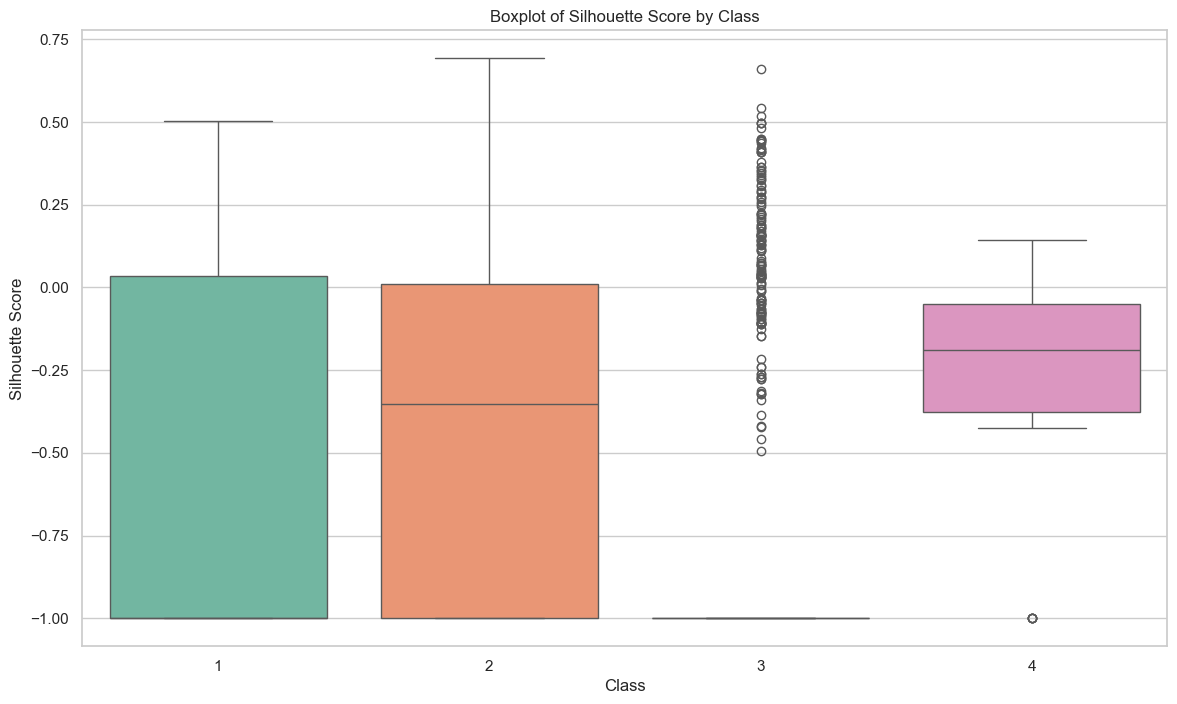

C:\Users\adibr\AppData\Local\Temp\ipykernel_4068\590560988.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='davies_bouldin_score', data=combined_df, palette="Set2")


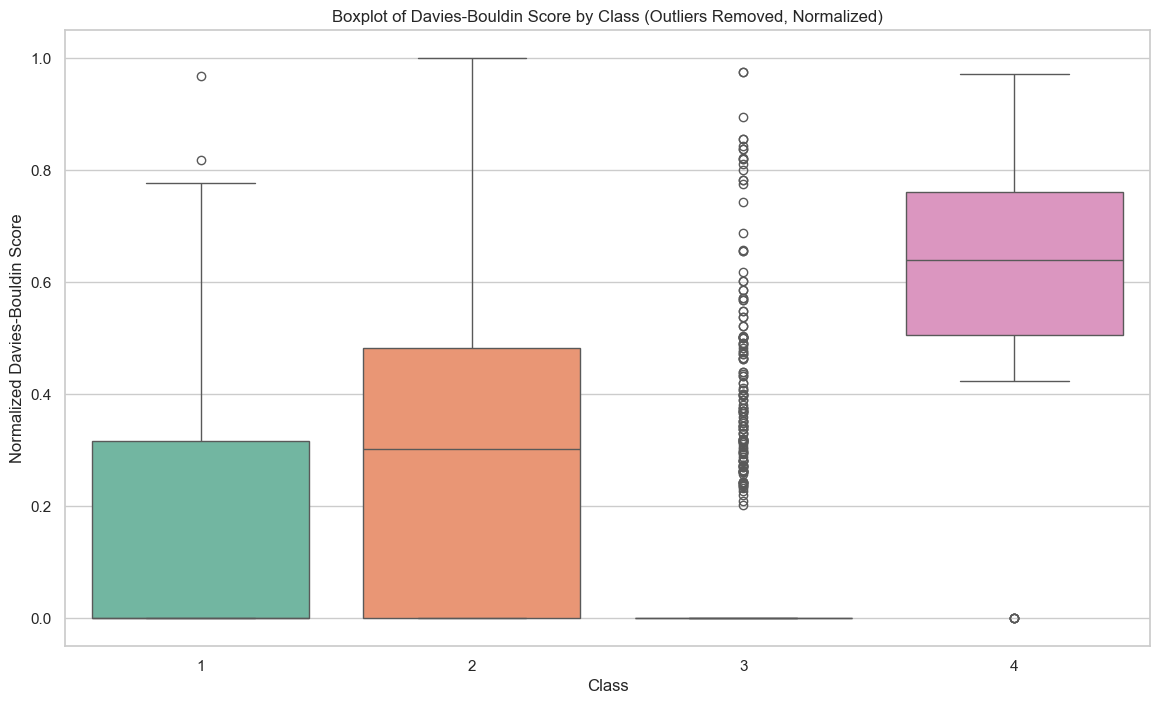

C:\Users\adibr\AppData\Local\Temp\ipykernel_4068\590560988.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='calinski_harabasz_score', data=combined_df, palette="Set2")


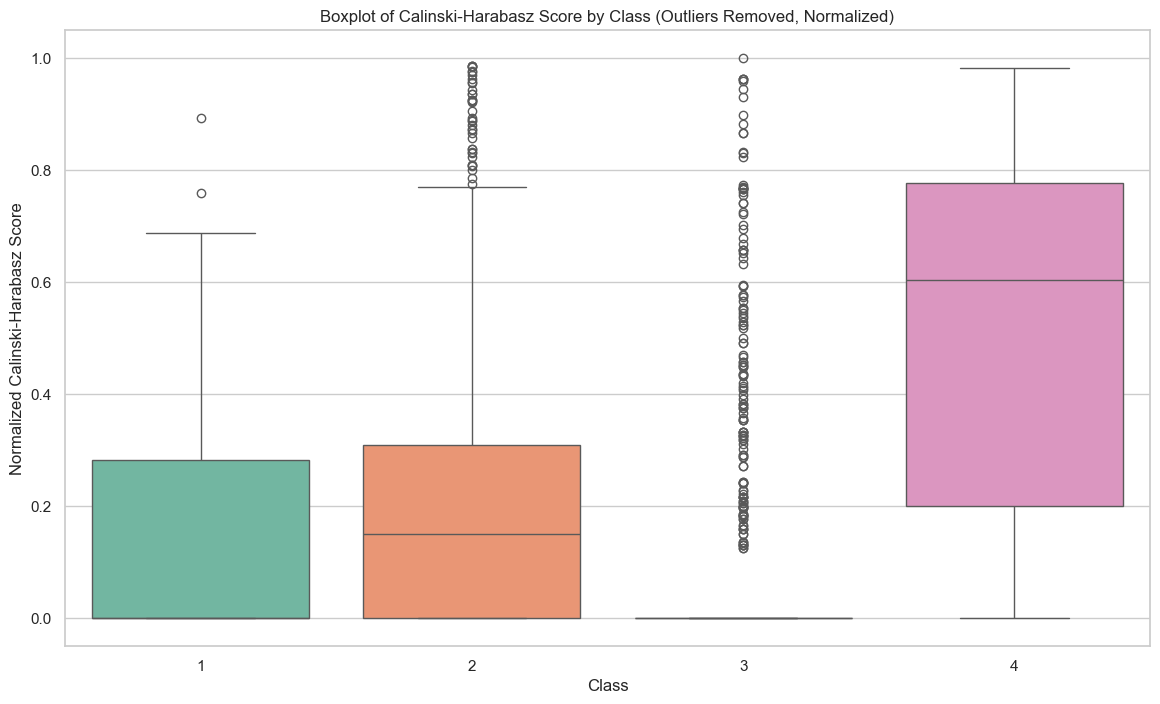

In [407]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the plot style
from sklearn.preprocessing import MinMaxScaler
sns.set(style="whitegrid")
# Remove outliers for Davies-Bouldin Score and Calinski-Harabasz Score
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Normalize a column between 0 and 1
def normalize_column(df, column):
    scaler = MinMaxScaler()
    df[[column]] = scaler.fit_transform(df[[column]])
    return df

combined_df['silhouette_score'] = combined_df['silhouette_score']*(-1)
# Remove outliers and normalize the Davies-Bouldin Score
combined_df = remove_outliers(combined_df, 'davies_bouldin_score')
combined_df = normalize_column(combined_df, 'davies_bouldin_score')

# Remove outliers and normalize the Calinski-Harabasz Score
combined_df = remove_outliers(combined_df, 'calinski_harabasz_score')
combined_df = normalize_column(combined_df, 'calinski_harabasz_score')

# Set the plot style
sns.set(style="whitegrid")

# Create a figure and axes for Silhouette Score
plt.figure(figsize=(14, 8))
sns.boxplot(x='class', y='silhouette_score', data=combined_df, palette="Set2")
plt.title('Boxplot of Silhouette Score by Class')
plt.xlabel('Class')
plt.ylabel('Silhouette Score')
plt.show()

# Create a figure and axes for Davies-Bouldin Score
plt.figure(figsize=(14, 8))
sns.boxplot(x='class', y='davies_bouldin_score', data=combined_df, palette="Set2")
plt.title('Boxplot of Davies-Bouldin Score by Class (Outliers Removed, Normalized)')
plt.xlabel('Class')
#plt.ylim(-2,10)
plt.ylabel('Normalized Davies-Bouldin Score')
plt.show()

# Create a figure and axes for Calinski-Harabasz Score
plt.figure(figsize=(14, 8))
sns.boxplot(x='class', y='calinski_harabasz_score', data=combined_df, palette="Set2")
plt.title('Boxplot of Calinski-Harabasz Score by Class (Outliers Removed, Normalized)')
plt.xlabel('Class')
#plt.ylim(-2,200)
plt.ylabel('Normalized Calinski-Harabasz Score')
plt.show()

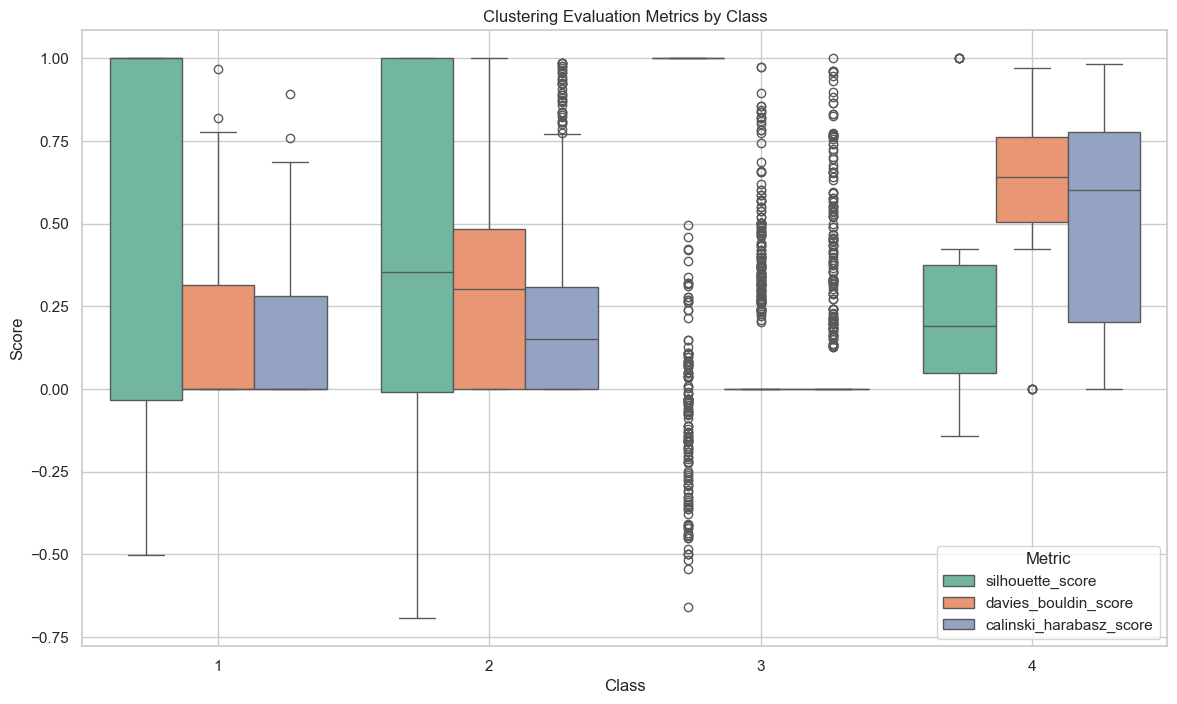

In [417]:
# Melt the dataframe to have all scores in a single column
combined_df['silhouette_score'] = combined_df['silhouette_score']*(-1)
melted_df = combined_df.melt(id_vars=['class'], value_vars=['silhouette_score', 'davies_bouldin_score', 'calinski_harabasz_score'], var_name='Metric', value_name='Score')

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='class', y='Score', hue='Metric', data=melted_df, palette="Set2")
plt.title('Clustering Evaluation Metrics by Class')
plt.xlabel('Class')
plt.ylabel('Score')
#plt.ylim(-2,50)
plt.legend(title='Metric', loc='lower right')
plt.grid(True)
plt.show()

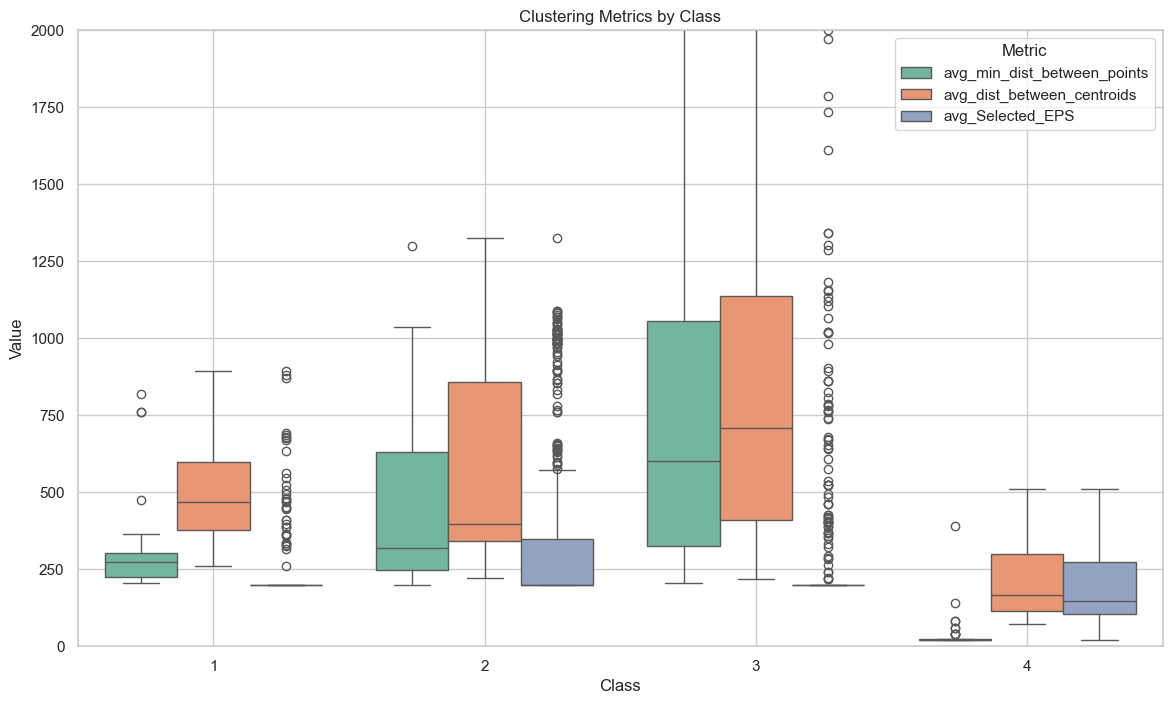

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'combined_clusters_with_kinematic_features.csv'
df = pd.read_csv(file_path)

# Calculate the number of points in a window by summing the cluster sizes
#df['points_in_window'] = df.groupby(['class', 'win_number'])['cluster_size'].transform('sum')

# Calculate the average minimum distance between points and average distance between centroids in each window
df['avg_min_dist_between_points'] = df.groupby(['class', 'win_number'])['min_dist_between_points'].transform('mean')
df['avg_dist_between_centroids'] = df.groupby(['class', 'win_number'])['min_dist_between_centroids'].transform('mean')
df['avg_Selected_EPS'] = df.groupby(['class', 'win_number'])['win_eps'].transform('mean')

# Create a new DataFrame with the aggregated data
agg_df = df.groupby(['class', 'win_number']).agg({
    
    'avg_Selected_EPS': 'first',
    'avg_min_dist_between_points': 'first',
    'avg_dist_between_centroids': 'first'
}).reset_index()

# Melt the dataframe to have all metrics in a single column
melted_df = agg_df.melt(id_vars=['class'], value_vars=[ 'avg_min_dist_between_points', 'avg_dist_between_centroids','avg_Selected_EPS'], var_name='Metric', value_name='Value')

# Create the combined boxplot with metrics divided by class
plt.figure(figsize=(14, 8))
sns.boxplot(x='class', y='Value', hue='Metric', data=melted_df, palette="Set2")
plt.title('Clustering Metrics by Class')
plt.xlabel('Class')
plt.ylabel('Value')
plt.ylim(0,2000)
plt.legend(title='Metric', loc='upper right')
plt.grid(True)
plt.show()


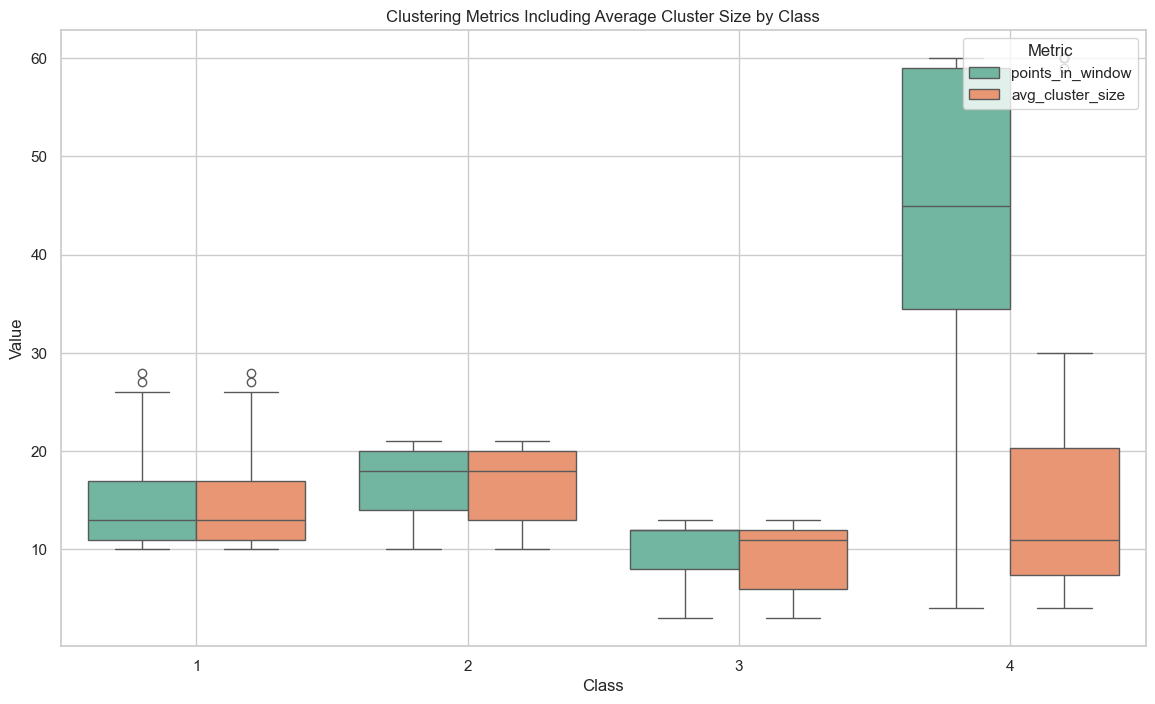

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'combined_clusters_with_kinematic_features.csv'
df = pd.read_csv(file_path)

# Calculate the number of points in a window by summing the cluster sizes
df['points_in_window'] = df.groupby(['class', 'win_number'])['cluster_size'].transform('sum')

# Calculate the average minimum distance between points and average distance between centroids in each window
df['avg_min_dist_between_points'] = df.groupby(['class', 'win_number'])['min_dist_between_points'].transform('mean')
df['avg_dist_between_centroids'] = df.groupby(['class', 'win_number'])['min_dist_between_centroids'].transform('mean')

# Calculate the average cluster size in each window
df['avg_cluster_size'] = df.groupby(['class', 'win_number'])['cluster_size'].transform('mean')

# Create a new DataFrame with the aggregated data
agg_df = df.groupby(['class', 'win_number']).agg({
    'points_in_window': 'first',
#    'avg_dist_between_centroids': 'first',
    'avg_cluster_size': 'first'
}).reset_index()

# Melt the dataframe to include average cluster size
melted_df = agg_df.melt(id_vars=['class'], value_vars=['points_in_window','avg_cluster_size'], var_name='Metric', value_name='Value')

# Create the combined boxplot with the new metric included
plt.figure(figsize=(14, 8))
sns.boxplot(x='class', y='Value', hue='Metric', data=melted_df, palette="Set2")
plt.title('Clustering Metrics Including Average Cluster Size by Class')
plt.xlabel('Class')
plt.ylabel('Value')
#plt.ylim(10,20)
plt.legend(title='Metric', loc='upper right')
plt.grid(True)
plt.show()


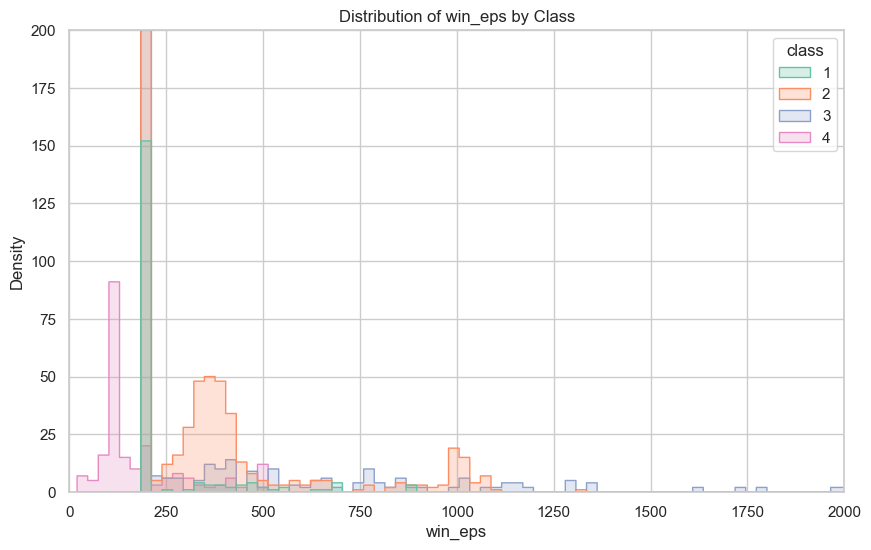

In [363]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('combined_clusters_with_kinematic_features.csv')

# Convert win_eps to numeric, coercing errors to NaN
#df['win_eps'] = pd.to_numeric(df['win_eps'], errors='coerce')

# Remove rows with NaN or infinite values in win_eps
#df_cleaned = df.dropna(subset=['win_eps'])
#df_cleaned = df_cleaned[np.isfinite(df_cleaned['win_eps'])]

# Plot the distribution of win_eps by class
plt.figure(figsize=(10, 6))
#sns.kdeplot(data=df, x='win_eps', hue='class', fill=True, common_norm=False, palette="Set2")
sns.histplot(data=df, x='win_eps', hue='class' ,palette="Set2", bins=300, element="step", fill=True)
plt.title('Distribution of win_eps by Class')
plt.xlabel('win_eps')
plt.xlim(0,2000)
plt.ylim(0,200)
plt.ylabel('Density')
plt.grid(True)
plt.show()


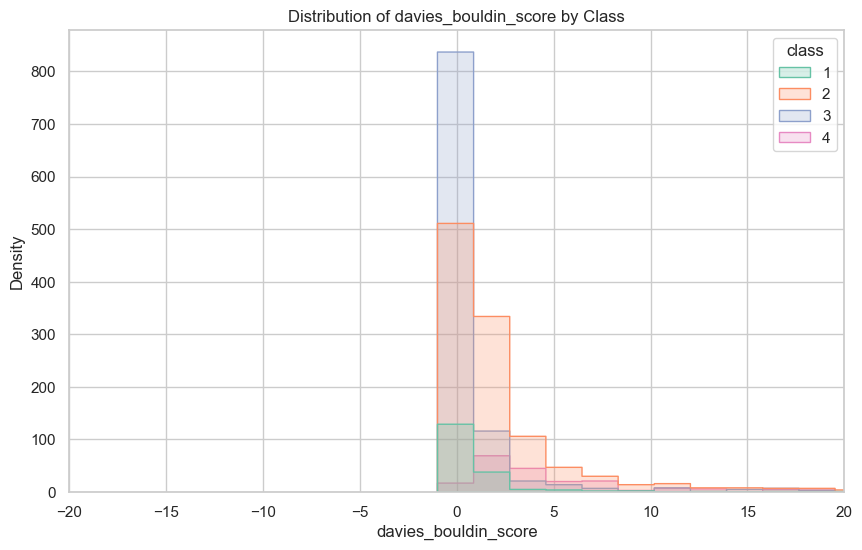

In [365]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#silhouette_score	davies_bouldin_score	calinski_harabasz_score
# Load the dataset
df = pd.read_csv('combined_clusters_with_kinematic_features.csv')

# Convert win_eps to numeric, coercing errors to NaN
df['davies_bouldin_score'] = pd.to_numeric(df['davies_bouldin_score'], errors='coerce')

# Remove rows with NaN or infinite values in win_eps
#df_cleaned = df.dropna(subset=['silhouette_score'])
#df_cleaned = df_cleaned[np.isfinite(df_cleaned['win_eps'])]

# Plot the distribution of win_eps by class
plt.figure(figsize=(10, 6))
#sns.kdeplot(data=df, x='davies_bouldin_score', hue='class', fill=True, common_norm=False, palette="Set2")
sns.histplot(data=df, x='davies_bouldin_score', hue='class' ,palette="Set2", bins=300, element="step", fill=True)
plt.title('Distribution of davies_bouldin_score by Class')
plt.xlabel('davies_bouldin_score')
plt.xlim(-20,20)
plt.ylabel('Density')
plt.grid(True)
plt.show()


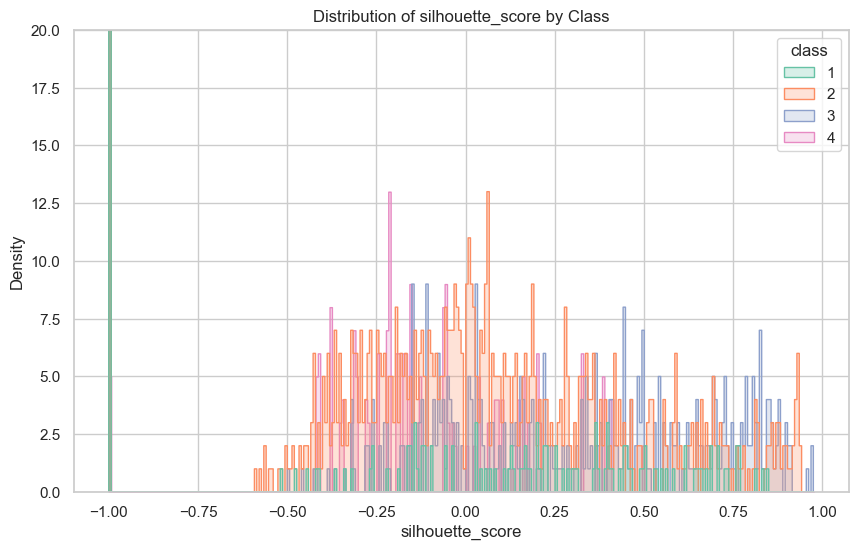

In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#silhouette_score	davies_bouldin_score	calinski_harabasz_score
# Load the dataset
df = pd.read_csv('combined_clusters_with_kinematic_features.csv')

# Convert win_eps to numeric, coercing errors to NaN
df['silhouette_score'] = pd.to_numeric(df['silhouette_score'], errors='coerce')

# Remove rows with NaN or infinite values in win_eps
#df_cleaned = df.dropna(subset=['silhouette_score'])
#df_cleaned = df_cleaned[np.isfinite(df_cleaned['win_eps'])]

# Plot the distribution of win_eps by class
plt.figure(figsize=(10, 6))
#sns.kdeplot(data=df, x='silhouette_score', hue='class', fill=True, common_norm=False, palette="Set2")
sns.histplot(data=df, x='silhouette_score', hue='class' ,palette="Set2", bins=300, element="step", fill=True)
plt.title('Distribution of silhouette_score by Class')
plt.xlabel('silhouette_score')
#plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel('Density')
plt.grid(True)
plt.show()


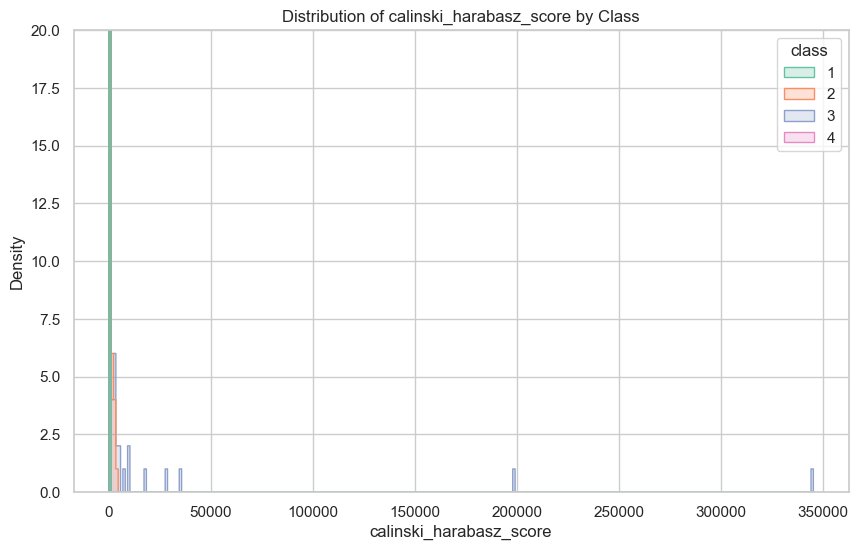

In [387]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#silhouette_score	davies_bouldin_score	calinski_harabasz_score
# Load the dataset
df = pd.read_csv('combined_clusters_with_kinematic_features.csv')

# Convert win_eps to numeric, coercing errors to NaN
#df['win_eps'] = pd.to_numeric(df['silhouette_score'], errors='coerce')

# Remove rows with NaN or infinite values in win_eps
#df_cleaned = df.dropna(subset=['silhouette_score'])
#df_cleaned = df_cleaned[np.isfinite(df_cleaned['win_eps'])]

# Plot the distribution of win_eps by class
plt.figure(figsize=(10, 6))
#sns.kdeplot(data=df, x='calinski_harabasz_score', hue='class', fill=True, common_norm=False, palette="Set2")
sns.histplot(data=df, x='calinski_harabasz_score', hue='class' ,palette="Set2", bins=300, element="step", fill=True)
plt.title('Distribution of calinski_harabasz_score by Class')
plt.xlabel('calinski_harabasz_score')
#plt.xlim(-200,200)
plt.ylim(0,20)
plt.ylabel('Density')
plt.grid(True)
plt.show()


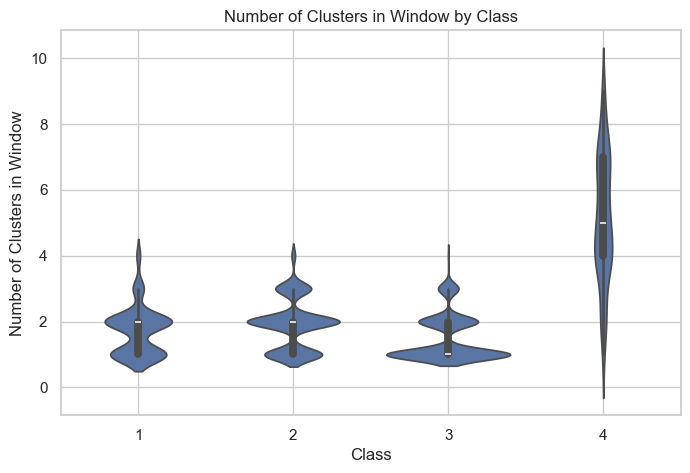

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'combined_clusters_with_kinematic_features.csv'
df = pd.read_csv(file_path)

# Create a boxplot of the number of clusters in a window, divided by class
plt.figure(figsize=(8, 5))
sns.violinplot(x='class', y='clusters_in_window', data=df)
plt.title('Number of Clusters in Window by Class')
plt.xlabel('Class')
plt.ylabel('Number of Clusters in Window')
plt.grid(True)
plt.show()


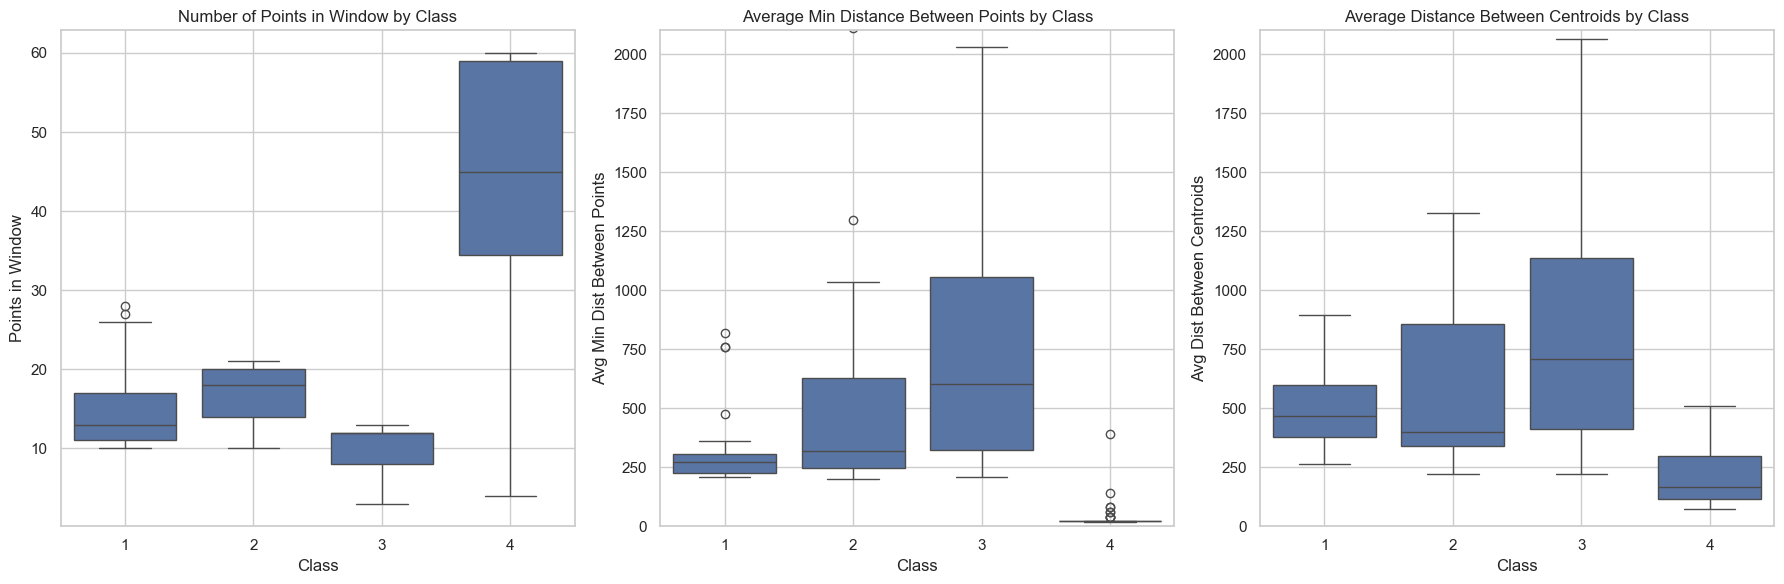

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'combined_clusters_with_kinematic_features.csv'
df = pd.read_csv(file_path)

# Calculate the number of points in a window by summing the cluster sizes
df['points_in_window'] = df.groupby(['class', 'win_number'])['cluster_size'].transform('sum')

# Calculate the average minimum distance between points and average distance between centroids in each window
df['avg_min_dist_between_points'] = df.groupby(['class', 'win_number'])['min_dist_between_points'].transform('mean')
df['avg_dist_between_centroids'] = df.groupby(['class', 'win_number'])['min_dist_between_centroids'].transform('mean')

# Create a new DataFrame with the aggregated data
agg_df = df.groupby(['class', 'win_number']).agg({
    'points_in_window': 'first',
    'avg_min_dist_between_points': 'first',
    'avg_dist_between_centroids': 'first'
}).reset_index()

# Create the boxplot
plt.figure(figsize=(18, 6))

# Boxplot for points in window
plt.subplot(1, 3, 1)
sns.boxplot(x='class', y='points_in_window', data=agg_df)
plt.title('Number of Points in Window by Class')
plt.xlabel('Class')
plt.ylabel('Points in Window')
plt.grid(True)

# Boxplot for average minimum distance between points
plt.subplot(1, 3, 2)
sns.boxplot(x='class', y='avg_min_dist_between_points', data=agg_df)
plt.title('Average Min Distance Between Points by Class')
plt.xlabel('Class')
plt.ylim(0,2100)
plt.ylabel('Avg Min Dist Between Points')
plt.grid(True)

# Boxplot for average distance between centroids
plt.subplot(1, 3, 3)
sns.boxplot(x='class', y='avg_dist_between_centroids', data=agg_df)
plt.title('Average Distance Between Centroids by Class')
plt.xlabel('Class')
plt.ylim(0,2100)
plt.ylabel('Avg Dist Between Centroids')
plt.grid(True)

plt.tight_layout()
plt.show()


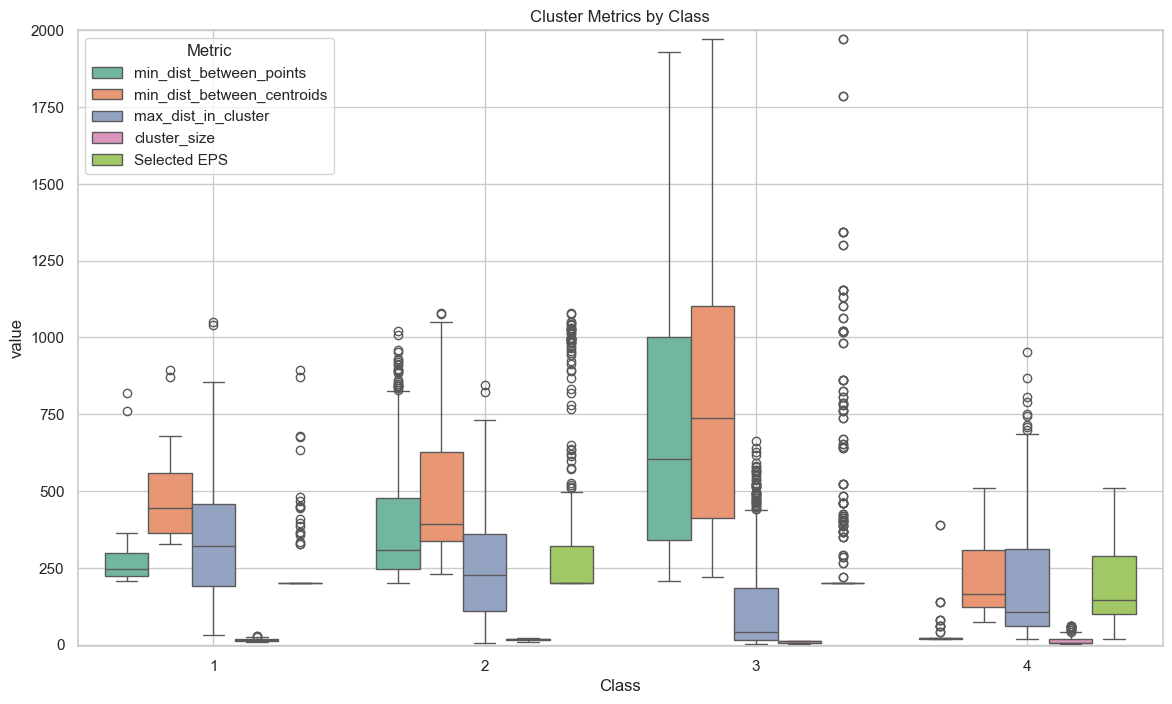

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
# Columns to process
columns_to_process = ['min_dist_between_points', 'min_dist_between_centroids', 'max_dist_in_cluster', 'cluster_size', 'Selected EPS','class']
melted_clusters_df = combined_df[columns_to_process]
# Remove outliers and normalize each column
#for column in columns_to_process:
    #combined_df = remove_outliers(combined_df, column)
    #if not combined_df.empty:
        #combined_df = normalize_column(combined_df, column)

# Set the plot style
sns.set(style="whitegrid")

# Melt the dataframe to have all scores in a single column
melted_clusters_df = combined_df.melt(id_vars=['class'], value_vars=columns_to_process, var_name='Metric', value_name='Score')

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='class', y='Score', hue='Metric', data=melted_clusters_df, palette="Set2")
plt.title('Cluster Metrics by Class')
plt.xlabel('Class')
plt.ylim(-5,2000)
plt.ylabel('value')
plt.legend(title='Metric', loc='upper left')
plt.grid(True)
plt.show()

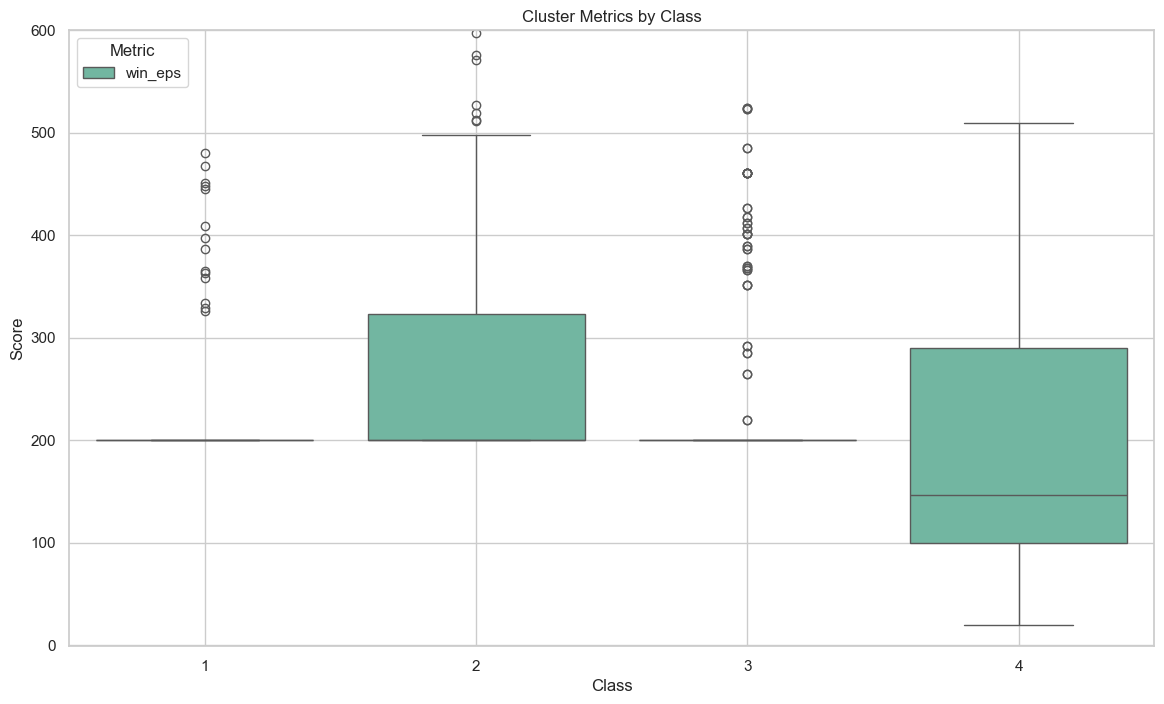

In [235]:
# Columns to process
columns_to_process = ['win_eps','class']
melted_clusters_df = combined_df[columns_to_process]
# Remove outliers and normalize each column
#for column in columns_to_process:
    #combined_df = remove_outliers(combined_df, column)
    #if not combined_df.empty:
        #combined_df = normalize_column(combined_df, column)

# Set the plot style
sns.set(style="whitegrid")

# Melt the dataframe to have all scores in a single column
melted_clusters_df = combined_df.melt(id_vars=['class'], value_vars=columns_to_process, var_name='Metric', value_name='Score')

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='class', y='Score', hue='Metric', data=melted_clusters_df, palette="Set2")
plt.title('Cluster Metrics by Class')
plt.xlabel('Class')
plt.ylim(-1,600)
plt.ylabel('Score')
plt.legend(title='Metric', loc='upper left')
plt.grid(True)
plt.show()

C:\Users\adibr\AppData\Local\Temp\ipykernel_4068\3320624574.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=column, data=combined_df, palette="Set2")
C:\Users\adibr\AppData\Local\Temp\ipykernel_4068\3320624574.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=column, data=combined_df, palette="Set2")
C:\Users\adibr\AppData\Local\Temp\ipykernel_4068\3320624574.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=column, data=combined_df, palette="Set2")


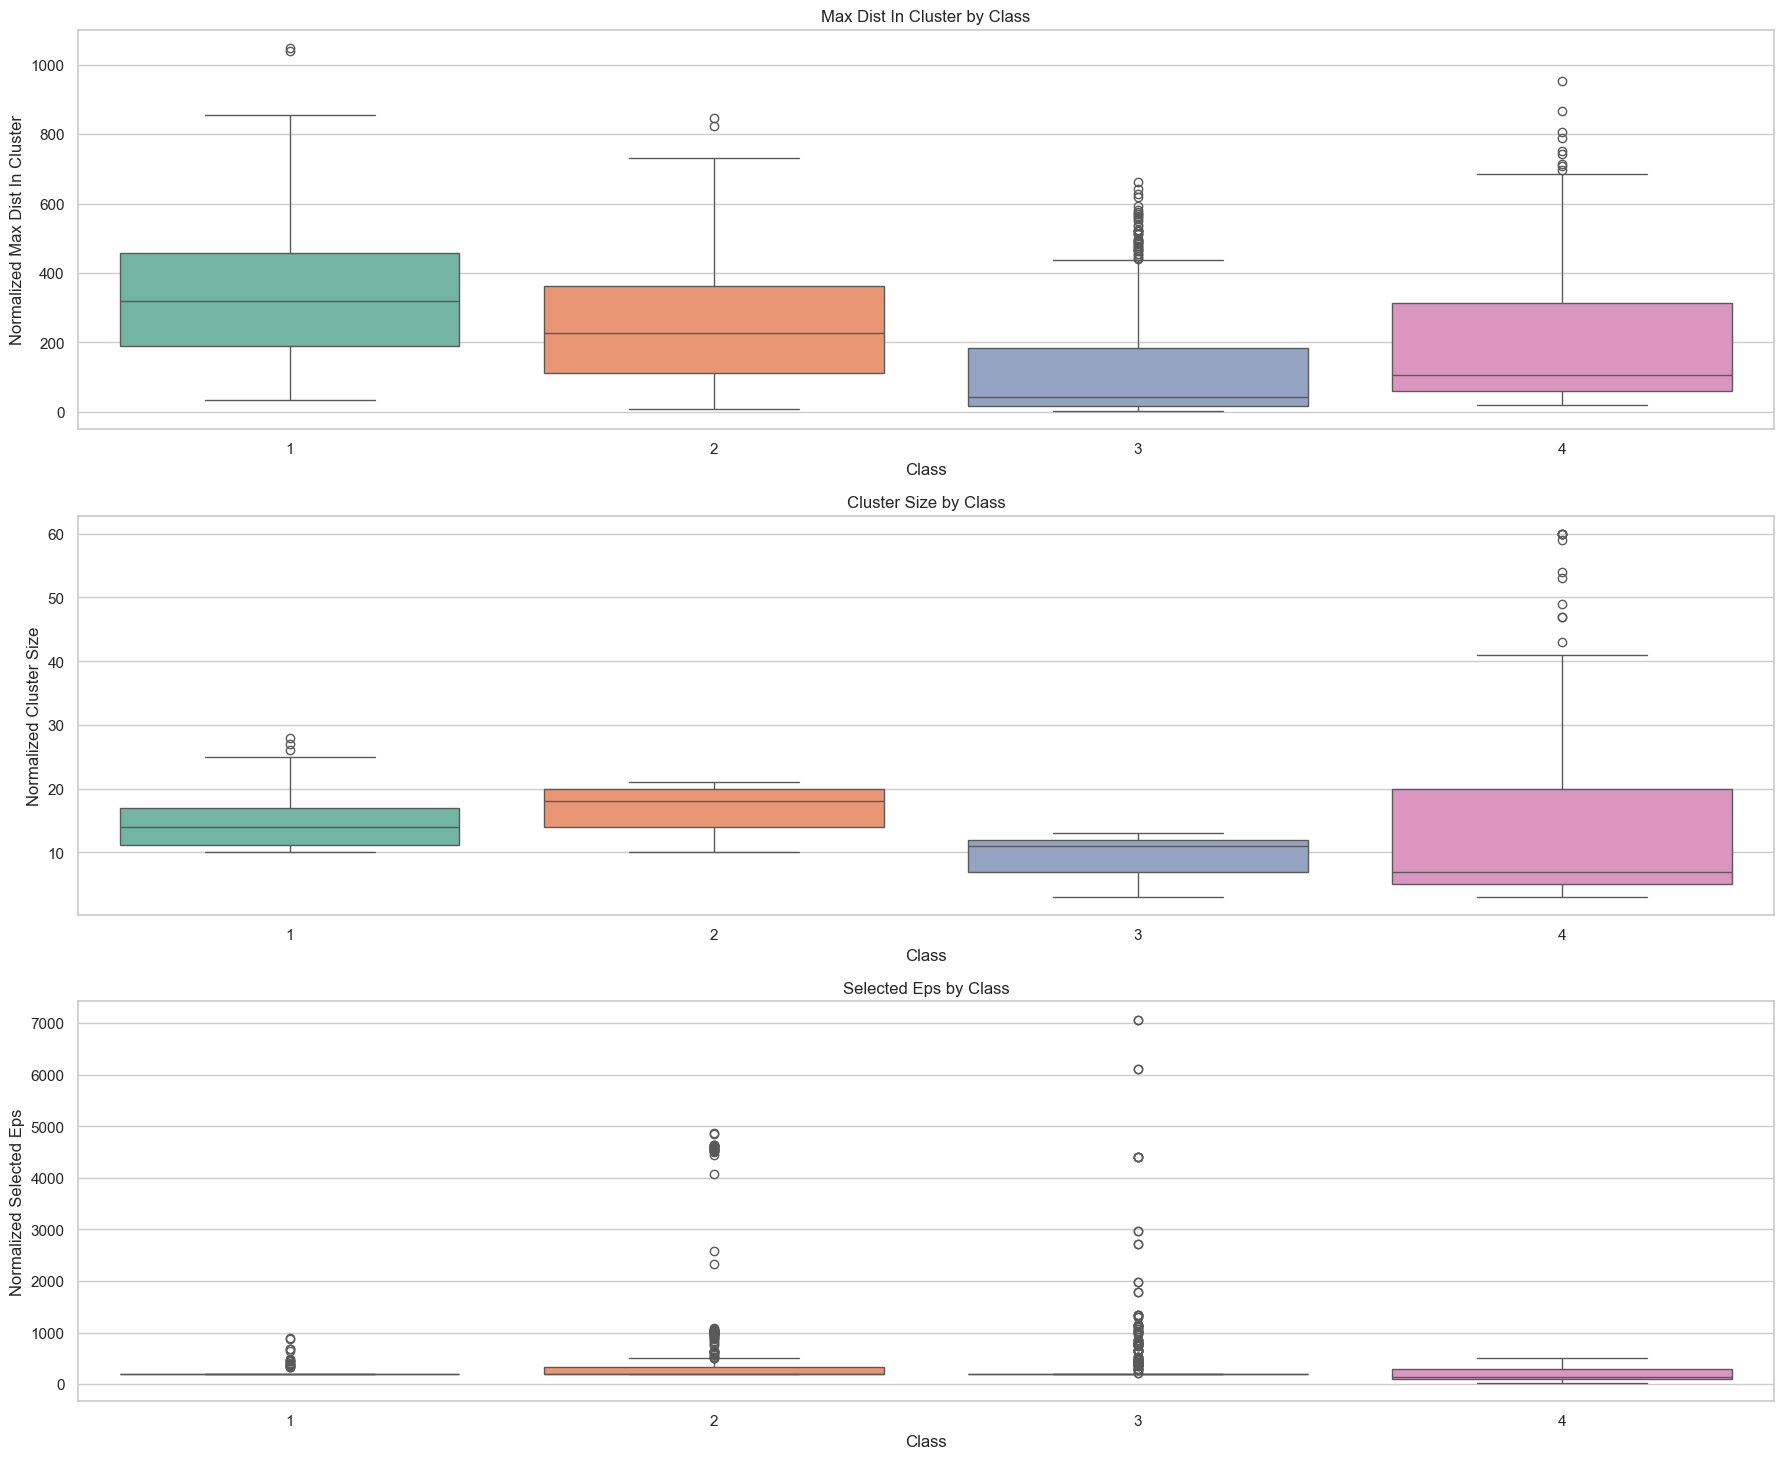

In [211]:
# Columns to process

#columns_to_process = ['min_dist_between_points', 'min_dist_between_centroids', 'max_dist_in_cluster', 'cluster_size', 'Selected EPS']
columns_to_process = ['max_dist_in_cluster', 'cluster_size', 'Selected EPS']
melted_clusters_df = combined_df[columns_to_process]


# Set the plot style
sns.set(style="whitegrid")

# Create a figure with subplots for each metric
plt.figure(figsize=(18, 24))

for i, column in enumerate(columns_to_process, 1):
    plt.subplot(5, 1, i)
    sns.boxplot(x='class', y=column, data=combined_df, palette="Set2")
    plt.title(f'{column.replace("_", " ").title()} by Class')
    plt.xlabel('Class')
    plt.ylabel(f'Normalized {column.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

C:\Users\adibr\AppData\Local\Temp\ipykernel_4068\4208032724.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='max_dist_in_cluster', data=combined_df, palette="Set2")


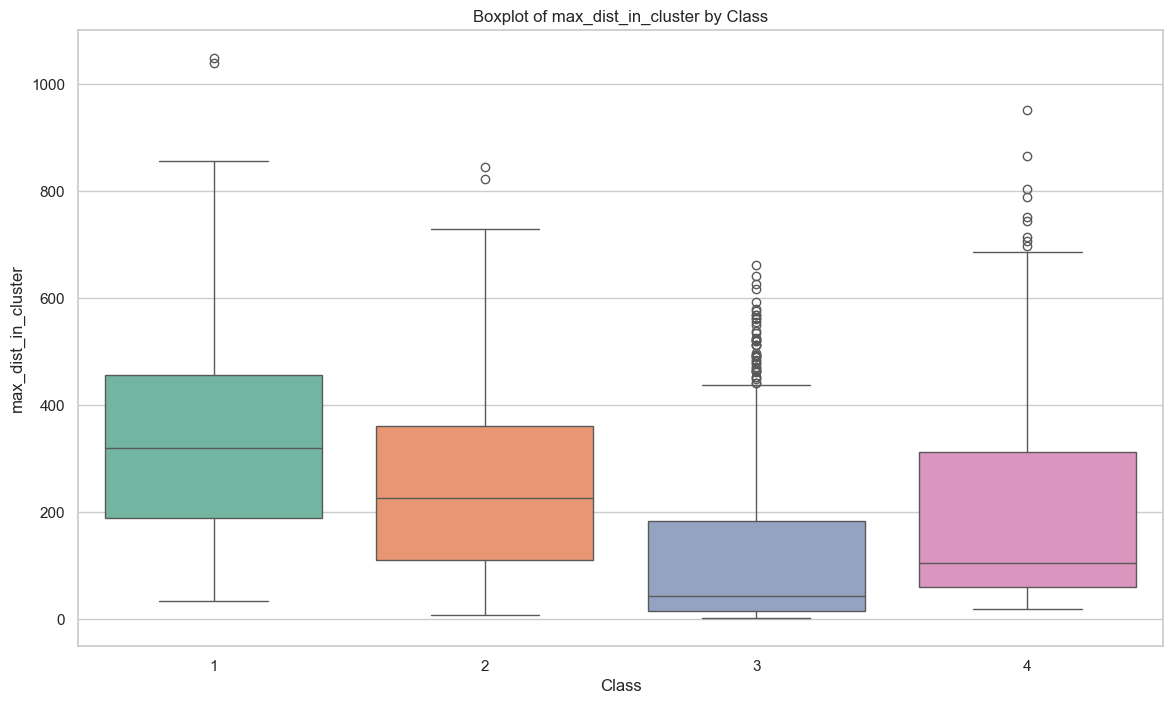

C:\Users\adibr\AppData\Local\Temp\ipykernel_4068\4208032724.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='cluster_size', data=combined_df, palette="Set2")


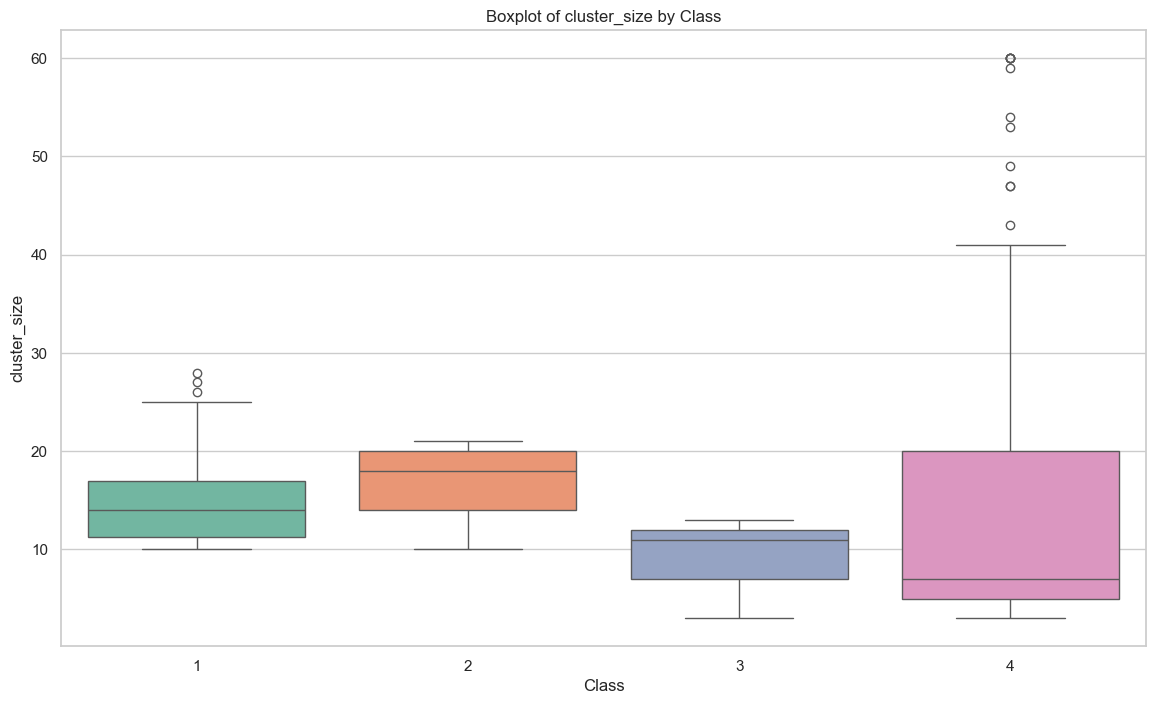

C:\Users\adibr\AppData\Local\Temp\ipykernel_4068\4208032724.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='Selected EPS', data=combined_df, palette="Set2")


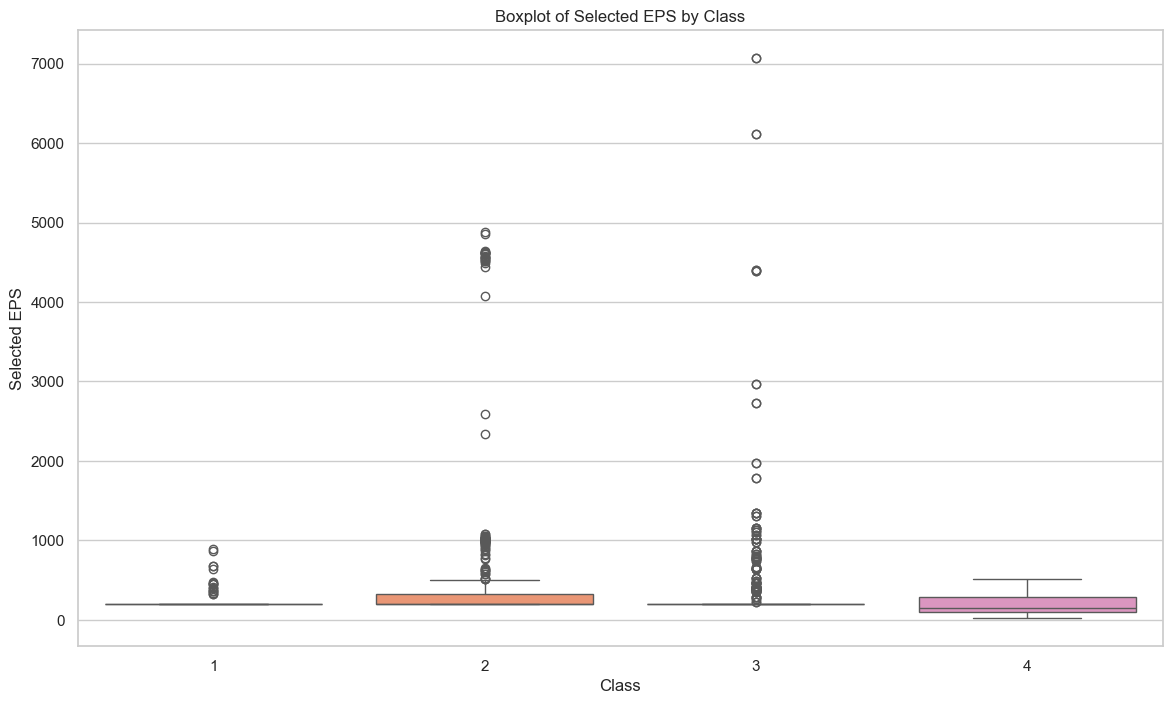

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the plot style
from sklearn.preprocessing import MinMaxScaler
sns.set(style="whitegrid")
# Remove outliers for Davies-Bouldin Score and Calinski-Harabasz Score
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Normalize a column between 0 and 1
def normalize_column(df, column):
    scaler = MinMaxScaler()
    df[[column]] = scaler.fit_transform(df[[column]])
    return df

# Remove outliers and normalize the Davies-Bouldin Score
#combined_df = remove_outliers(combined_df, 'davies_bouldin_score')
#combined_df = normalize_column(combined_df, 'davies_bouldin_score')

# Remove outliers and normalize the Calinski-Harabasz Score
#combined_df = remove_outliers(combined_df, 'calinski_harabasz_score')
#combined_df = normalize_column(combined_df, 'calinski_harabasz_score')

columns_to_process = ['min_dist_between_points', 'min_dist_between_centroids', 'max_dist_in_cluster', 'cluster_size', 'Selected EPS']


# Set the plot style
sns.set(style="whitegrid")

# Create a figure and axes for Silhouette Score
#plt.figure(figsize=(14, 8))
#sns.boxplot(x='class', y='min_dist_between_points', data=combined_df, palette="Set2")
#plt.title('Boxplot of min_dist_between_points by Class')
#plt.xlabel('Class')
#plt.ylabel('min_dist_between_points')
#plt.show()

# Create a figure and axes for Davies-Bouldin Score
#plt.figure(figsize=(14, 8))
#sns.boxplot(x='class', y='min_dist_between_centroids', data=combined_df, palette="Set2")
#plt.title('Boxplot of min_dist_between_centroids by Class')
#plt.xlabel('Class')
#plt.ylabel('min_dist_between_centroids')
#plt.show()

# Create a figure and axes for Calinski-Harabasz Score
plt.figure(figsize=(14, 8))
sns.boxplot(x='class', y='max_dist_in_cluster', data=combined_df, palette="Set2")
plt.title('Boxplot of max_dist_in_cluster by Class')
plt.xlabel('Class')
plt.ylabel('max_dist_in_cluster')
plt.show()


plt.figure(figsize=(14, 8))
sns.boxplot(x='class', y='cluster_size', data=combined_df, palette="Set2")
plt.title('Boxplot of cluster_size by Class')
plt.xlabel('Class')
plt.ylabel('cluster_size')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='class', y='Selected EPS', data=combined_df, palette="Set2")
plt.title('Boxplot of Selected EPS by Class')
plt.xlabel('Class')
plt.ylabel('Selected EPS')
plt.show()

# Classification Model

To classify the clusters based on the given features, I suggest using a Random Forest classifier. This model is well-suited for handling datasets with multiple features and can effectively manage both numerical and categorical data. Random Forest is also robust against overfitting, especially when dealing with a relatively large number of features, as in this case.

Steps to Implement the Classification Model
Data Preprocessing:
Handle any missing values in the dataset.
Normalize or scale the features if necessary (though Random Forest is generally robust to unscaled features).
Split the dataset into training and testing sets.

Model Selection:
Use a Random Forest classifier from scikit-learn.

Model Training:
Train the model on the training set using the specified features.

Model Evaluation:
Evaluate the model's performance on the testing set using metrics like accuracy, precision, recall, F1-score, and confusion matrix.

Feature Importance:
Analyze feature importance to understand which features contribute most to the classification.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("combined_clusters_with_kinematic_features.csv")

# Define the features and the target variable
features = ['avg_height', 'turn_rate', 'bearing',
            'trajectory_curvature', 'angular_acceleration', 'angular_velocity',
            'distance_traveled', 'displacement', 'jerk', 'vertical_acceleration',
            'up_down_direction', 'angle_to_horizon', 'average_speed',
            'average_velocity_magnitude', 'average_velocity_direction']

X = df[features]
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:\n", feature_importances)


Accuracy: 0.9755996691480563
Confusion Matrix:
 [[ 129   52    0    0]
 [   1 1047    6    0]
 [   0    0  977    0]
 [   0    0    0  206]]
Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.71      0.83       181
           2       0.95      0.99      0.97      1054
           3       0.99      1.00      1.00       977
           4       1.00      1.00      1.00       206

    accuracy                           0.98      2418
   macro avg       0.98      0.93      0.95      2418
weighted avg       0.98      0.98      0.97      2418

Feature Importances:
                             importance
avg_height                    0.272373
turn_rate                     0.240057
average_speed                 0.104863
average_velocity_magnitude    0.095883
distance_traveled             0.049476
displacement                  0.045330
jerk                          0.040907
vertical_acceleration         0.035704
angular_acceleration       

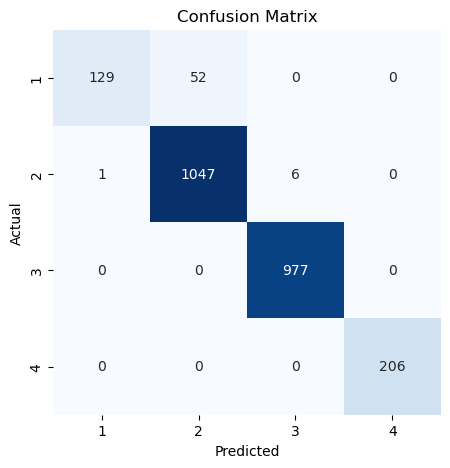

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf_classifier.classes_,
            yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\adibr\AppData\Local\Temp\ipykernel_1536\2094699786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.importance, y=feature_importances.index, palette='viridis')


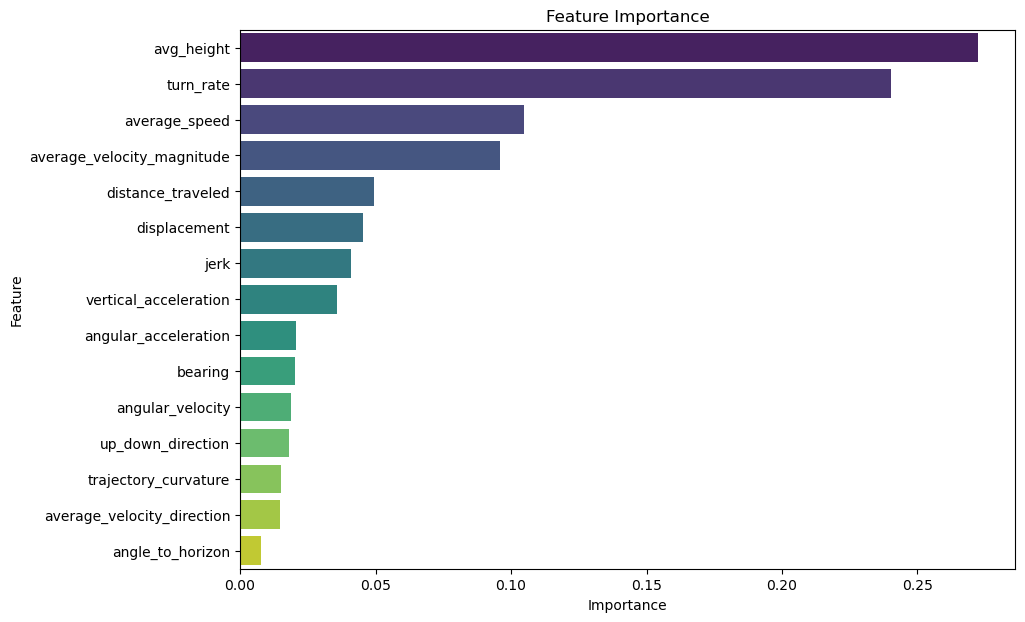

In [5]:
# Plot the feature importances
plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances.importance, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

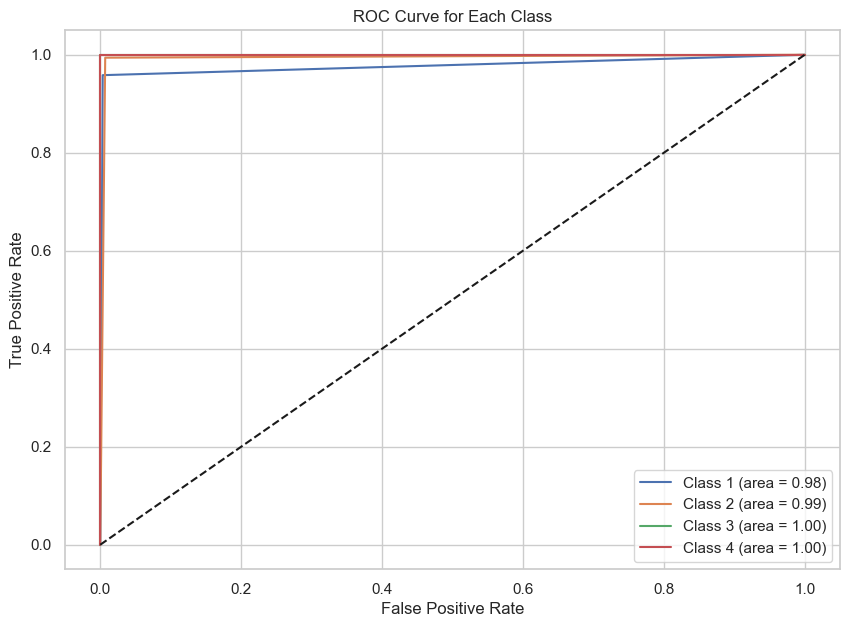

In [399]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=rf_classifier.classes_)
y_pred_binarized = label_binarize(y_pred, classes=rf_classifier.classes_)

# Compute ROC curve and ROC area for each class
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {rf_classifier.classes_[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


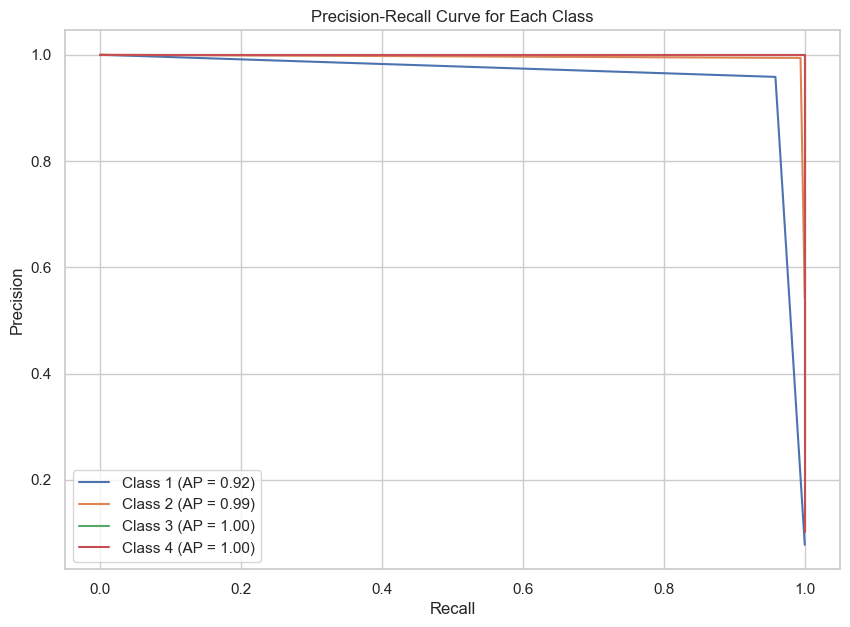

In [401]:
# Precision-Recall Curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Calculate precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred_binarized[:, i])

# Plot Precision-Recall curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {rf_classifier.classes_[i]} (AP = {average_precision[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc="lower left")
plt.show()



#### ROC Curve for Each Class

The ROC (Receiver Operating Characteristic) curve is a graphical representation that shows the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under the curve (AUC) quantifies the overall ability of the model to distinguish between different classes.

**Key Points:**
- **True Positive Rate (TPR) (Sensitivity or Recall):** The proportion of actual positives correctly identified by the model.
- **False Positive Rate (FPR):** The proportion of actual negatives incorrectly identified as positives by the model.
- **Area Under the Curve (AUC):** A higher AUC indicates better model performance, with 1.0 being perfect and 0.5 representing a model with no discriminative ability.

**Interpretation of the ROC Curve for Each Class:**
- **Class Discrimination:** Each curve in the plot represents the model's performance in distinguishing one specific class from all others (one-vs-rest approach). The closer the curve is to the top-left corner, the better the model is at distinguishing that class.
- **AUC Scores:** The area under each curve (AUC) is provided in the legend. An AUC closer to 1.0 indicates a strong ability to distinguish that class from others, while an AUC closer to 0.5 suggests poor discriminative performance.
- **Performance Differences:** If the ROC curves for certain classes are significantly below others (lower AUC), this indicates that the model struggles more with those classes, either due to class imbalance, overlapping features, or other complexities.

#### Precision-Recall Curve for Each Class

The Precision-Recall curve is another performance evaluation metric, particularly useful for imbalanced datasets. It plots precision (positive predictive value) against recall (sensitivity) for different threshold settings.

**Key Points:**
- **Precision:** The proportion of positive identifications that are actually correct.
- **Recall:** The proportion of actual positives correctly identified.
- **Average Precision (AP):** This score summarizes the precision-recall curve into a single value. It is similar to the AUC in the ROC curve but focuses on the positive class.

**Interpretation of the Precision-Recall Curve for Each Class:**
- **Class Performance:** Each line represents the trade-off between precision and recall for a specific class. A curve closer to the top-right corner indicates better performance, with both high precision and high recall.
- **Average Precision (AP):** The AP score for each class gives a single-number summary of the precision-recall curve. Higher AP values indicate better performance.
- **Imbalanced Data Sensitivity:** Precision-Recall curves are especially useful when dealing with imbalanced datasets, as they focus on the performance with respect to the positive class. A high precision-recall curve indicates that the model is not only good at identifying positives but also does so with minimal false positives.


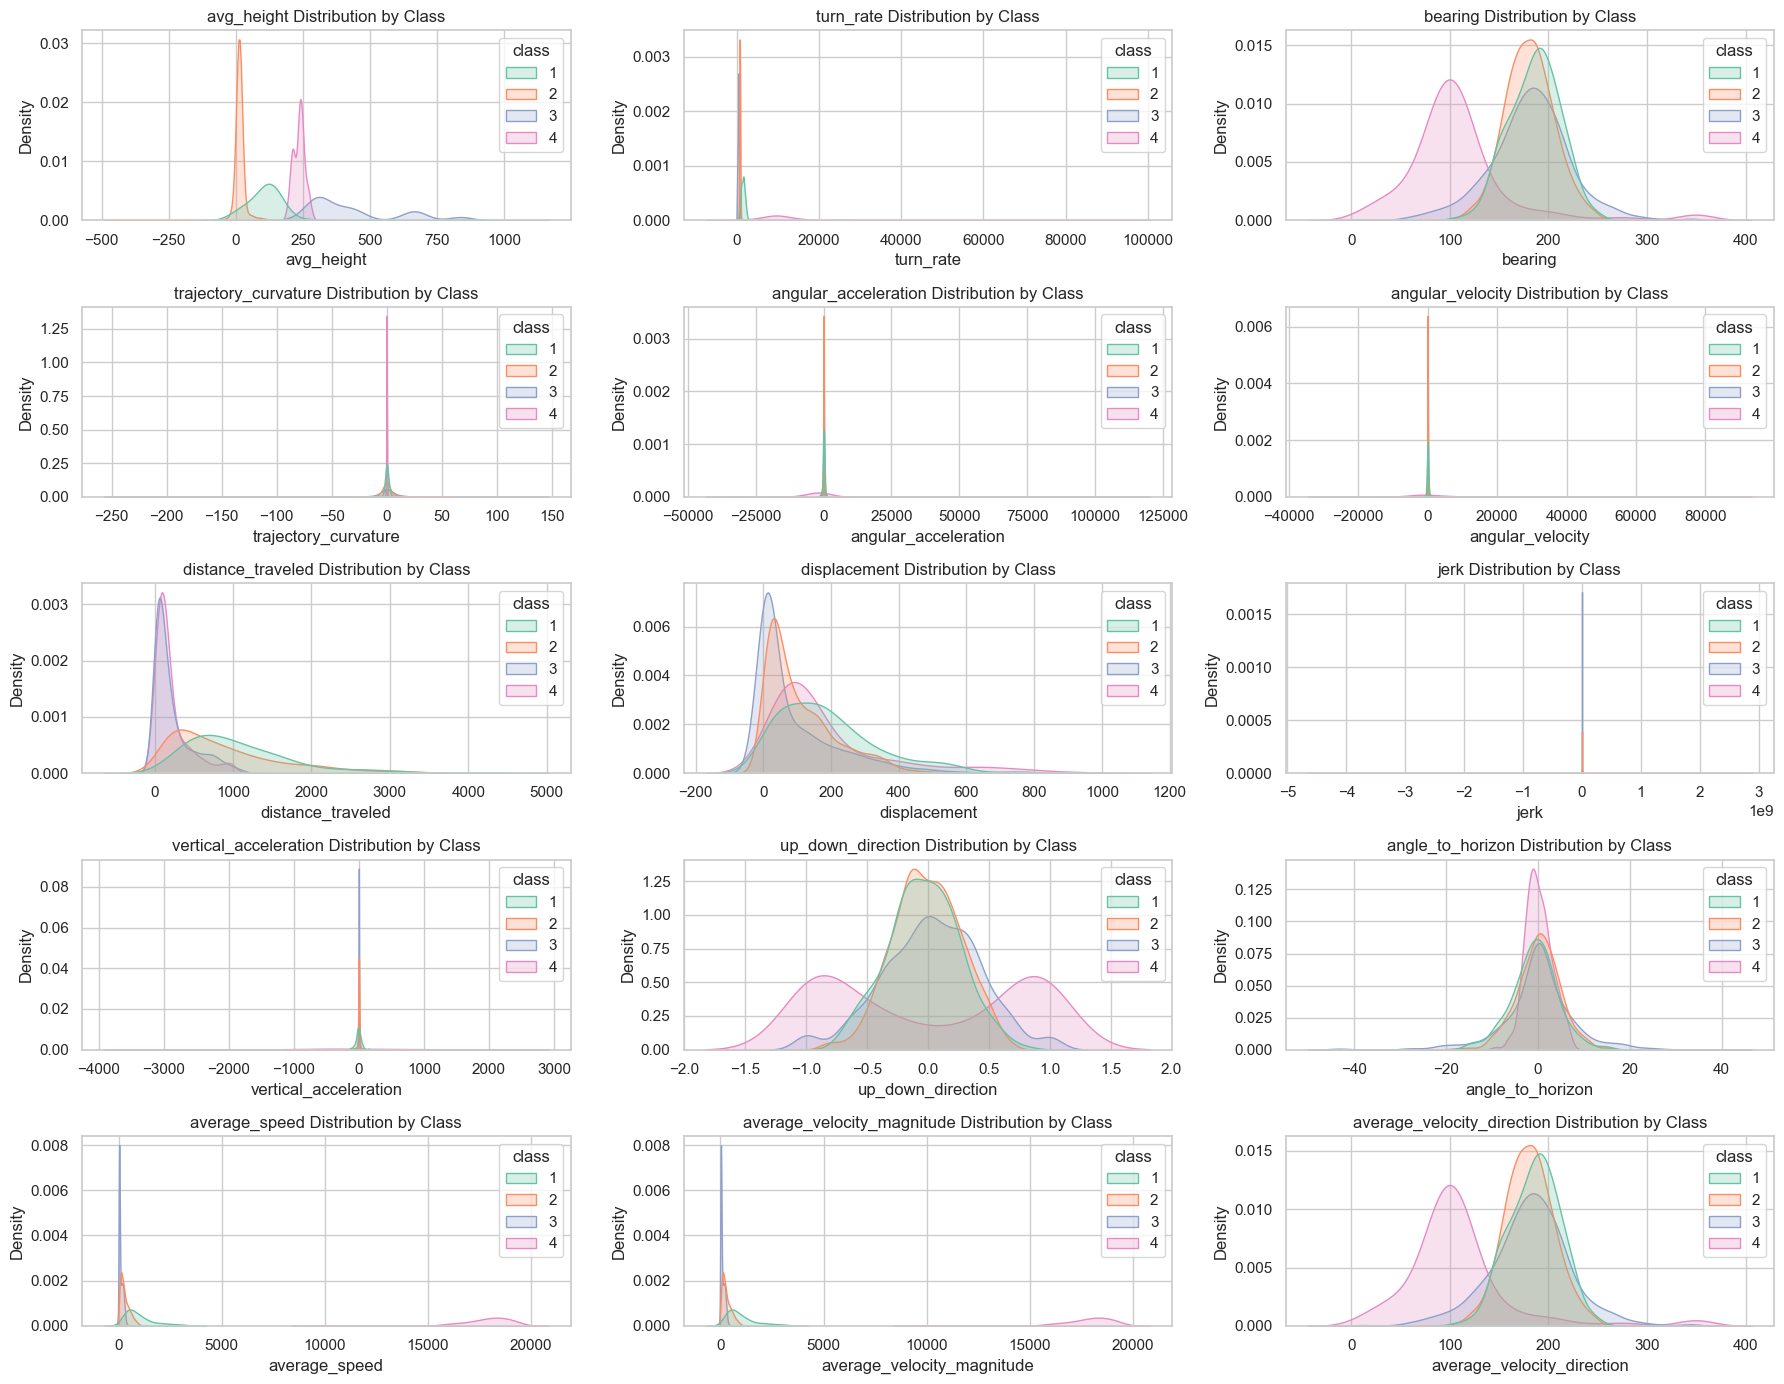

In [227]:

from scipy.stats import f_oneway, ttest_ind

# Load the dataset
df = pd.read_csv("combined_clusters_with_kinematic_features.csv")

# Define the columns to plot
columns_to_plot = ['avg_height', 'turn_rate', 'bearing', 'trajectory_curvature', 
                   'angular_acceleration', 'angular_velocity', 'distance_traveled', 
                   'displacement', 'jerk', 'vertical_acceleration', 'up_down_direction', 
                   'angle_to_horizon', 'average_speed', 'average_velocity_magnitude', 
                   'average_velocity_direction']

# Set up the plot grid
fig = plt.figure(figsize=(18, 14))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 3, i)
    sns.kdeplot(data=df, x=column, hue="class", fill=True, common_norm=False, palette="Set2")
    plt.title(f'{column} Distribution by Class')

plt.tight_layout()
plt.show()


In [98]:
fig.savefig('combined_kinematics_distributions.png')

In [99]:

# Perform ANOVA for each feature across classes
anova_results = {}
for column in columns_to_plot:
    groups = [df[df['class'] == cls][column] for cls in df['class'].unique()]
    anova_result = f_oneway(*groups)
    anova_results[column] = anova_result.pvalue

# Display the ANOVA results
anova_results_df = pd.DataFrame(list(anova_results.items()), columns=['Feature', 'ANOVA p-value'])
print(anova_results_df)

                       Feature  ANOVA p-value
0                   avg_height   0.000000e+00
1                    turn_rate   0.000000e+00
2                      bearing  7.720443e-192
3         trajectory_curvature   1.287212e-01
4         angular_acceleration            NaN
5             angular_velocity   9.964420e-01
6            distance_traveled  9.661396e-108
7                 displacement   4.816551e-27
8                         jerk            NaN
9        vertical_acceleration   9.189932e-01
10           up_down_direction            NaN
11            angle_to_horizon   5.356441e-02
12               average_speed   0.000000e+00
13  average_velocity_magnitude   0.000000e+00
14  average_velocity_direction  7.720443e-192


In [100]:
# T-Tests

# Perform pairwise t-tests between each pair of classes for each feature
ttest_results = []
class_pairs = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

for column in columns_to_plot:
    for (class1, class2) in class_pairs:
        group1 = df[df['class'] == class1][column]
        group2 = df[df['class'] == class2][column]
        ttest_result = ttest_ind(group1, group2)
        ttest_results.append({
            'Feature': column,
            'Class Pair': f'{class1} vs {class2}',
            'T-test p-value': ttest_result.pvalue
        })

# Convert t-test results to DataFrame
ttest_results_df = pd.DataFrame(ttest_results)
print(ttest_results_df)


                       Feature Class Pair  T-test p-value
0                   avg_height     1 vs 2    1.548878e-99
1                   avg_height     1 vs 3    1.343276e-85
2                   avg_height     1 vs 4    8.253208e-32
3                   avg_height     2 vs 3    0.000000e+00
4                   avg_height     2 vs 4    0.000000e+00
..                         ...        ...             ...
85  average_velocity_direction     1 vs 3    4.722718e-01
86  average_velocity_direction     1 vs 4    2.954852e-51
87  average_velocity_direction     2 vs 3    1.803024e-02
88  average_velocity_direction     2 vs 4   1.012534e-152
89  average_velocity_direction     3 vs 4    6.292770e-97

[90 rows x 3 columns]


In [101]:
ttest_results_df

,Feature,Class Pair,T-test p-value
0,avg_height,1 vs 2,1.548878e-99
1,avg_height,1 vs 3,1.343276e-85
2,avg_height,1 vs 4,8.253208e-32
3,avg_height,2 vs 3,0.000000e+00
4,avg_height,2 vs 4,0.000000e+00
...,...,...,...
85,average_velocity_direction,1 vs 3,4.722718e-01
86,average_velocity_direction,1 vs 4,2.954852e-51
87,average_velocity_direction,2 vs 3,1.803024e-02
88,average_velocity_direction,2 vs 4,1.012534e-152


In [308]:
import warnings
warnings.filterwarnings('ignore')

Performing Poisson Regression for Class 1
                 Generalized Linear Model Regression Results                  
Dep. Variable:            point_count   No. Observations:                  187
Model:                            GLM   Df Residuals:                      174
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -445.95
Date:                Thu, 22 Aug 2024   Deviance:                       52.780
Time:                        22:16:44   Pearson chi2:                     54.0
No. Iterations:                     4   Pseudo R-squ. (CS):             0.5047
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

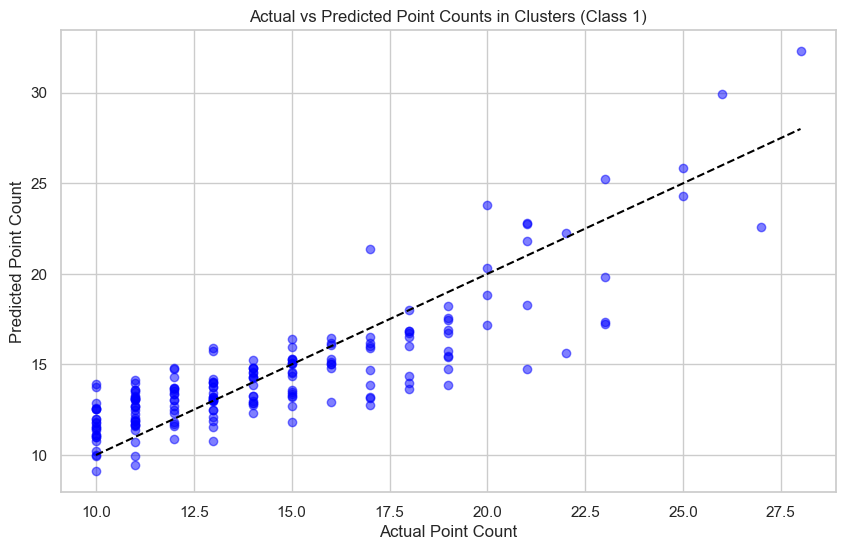

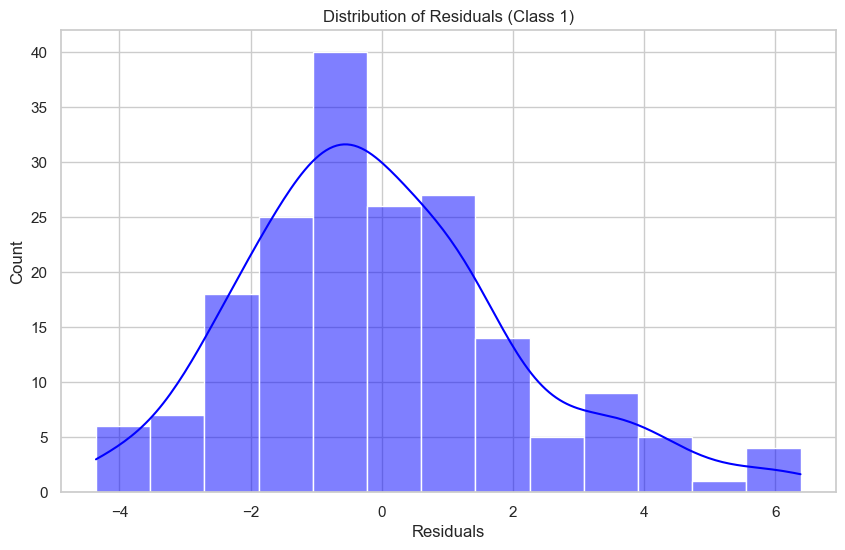

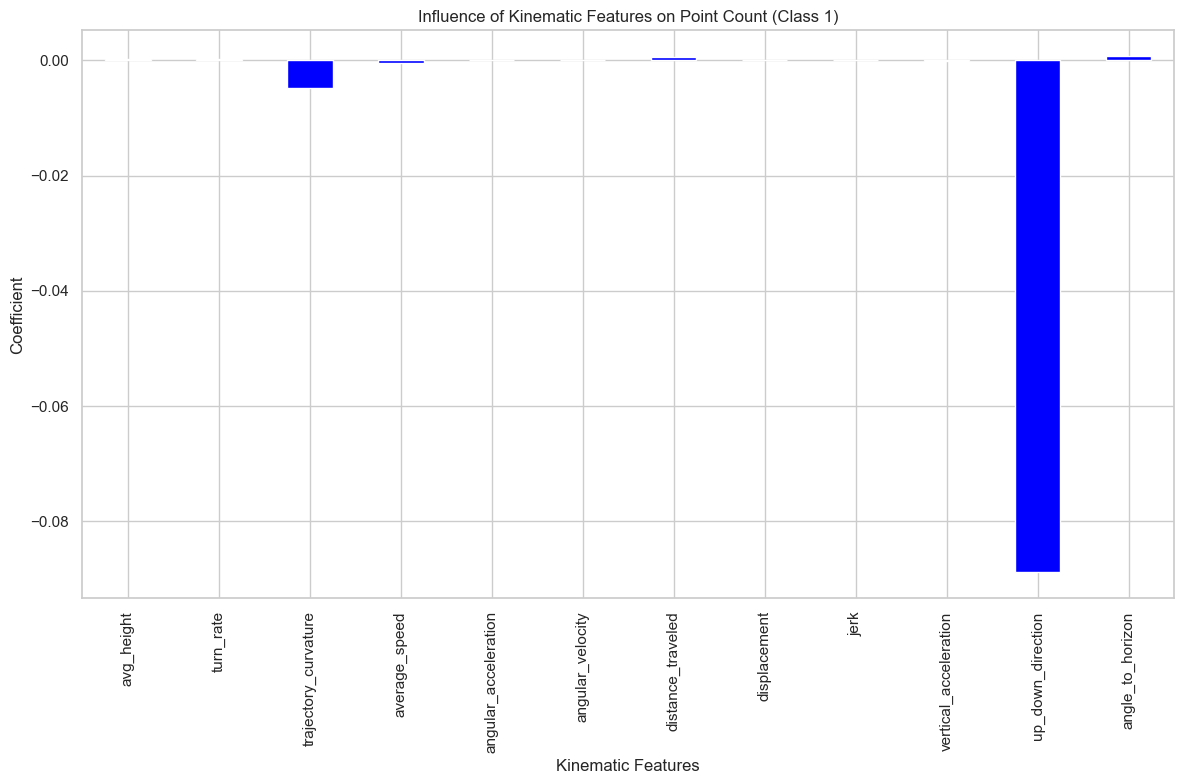

Performing Poisson Regression for Class 2
                 Generalized Linear Model Regression Results                  
Dep. Variable:            point_count   No. Observations:                 1116
Model:                            GLM   Df Residuals:                     1103
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2793.7
Date:                Thu, 22 Aug 2024   Deviance:                       426.69
Time:                        22:16:45   Pearson chi2:                     414.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.3331
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

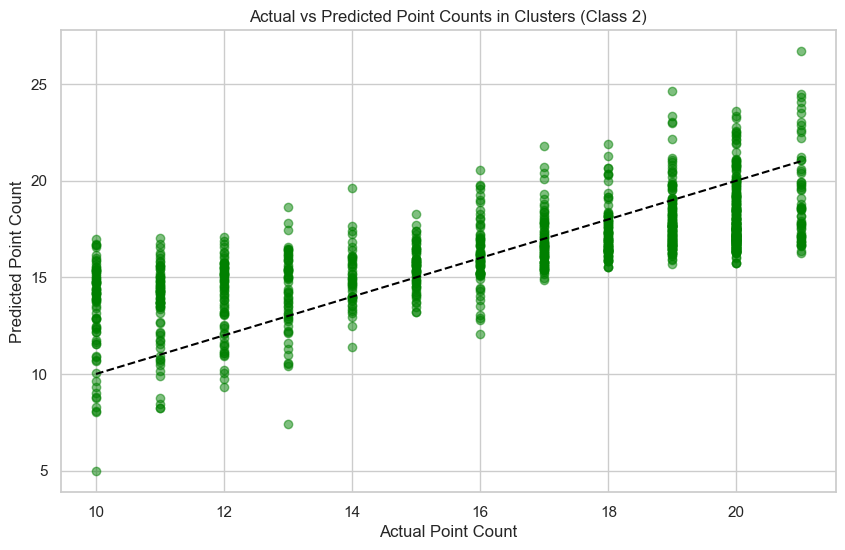

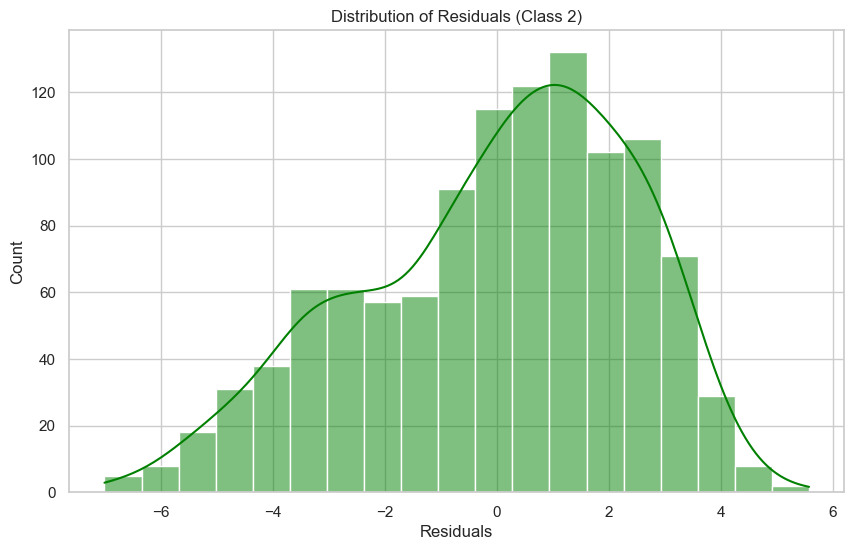

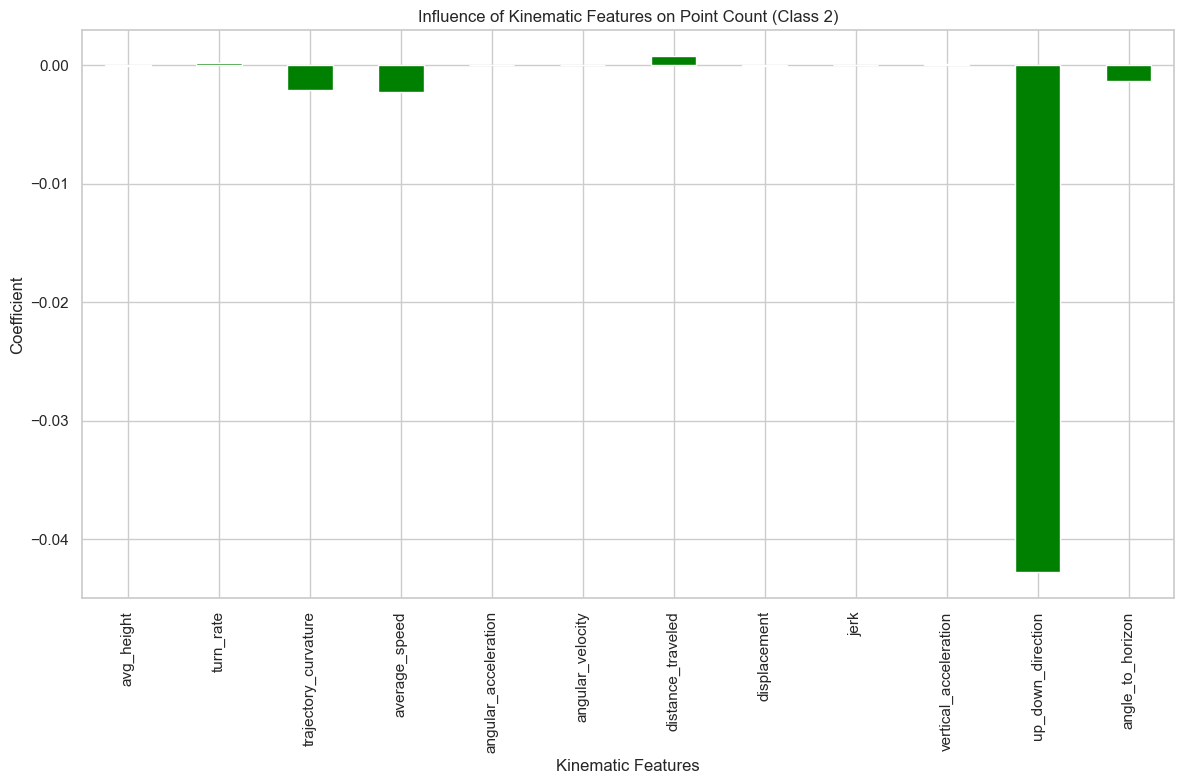

Performing Poisson Regression for Class 3
                 Generalized Linear Model Regression Results                  
Dep. Variable:            point_count   No. Observations:                  537
Model:                            GLM   Df Residuals:                      524
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1167.0
Date:                Thu, 22 Aug 2024   Deviance:                       15.105
Time:                        22:16:46   Pearson chi2:                     14.7
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01814
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

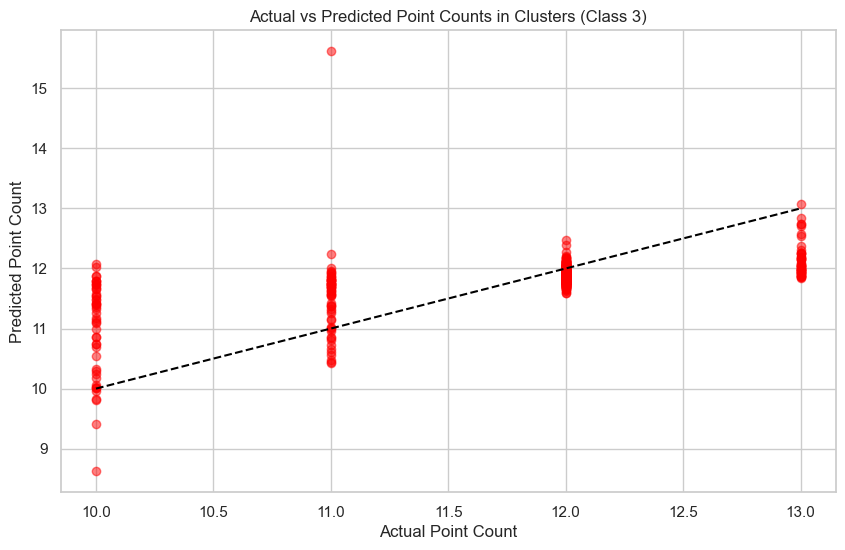

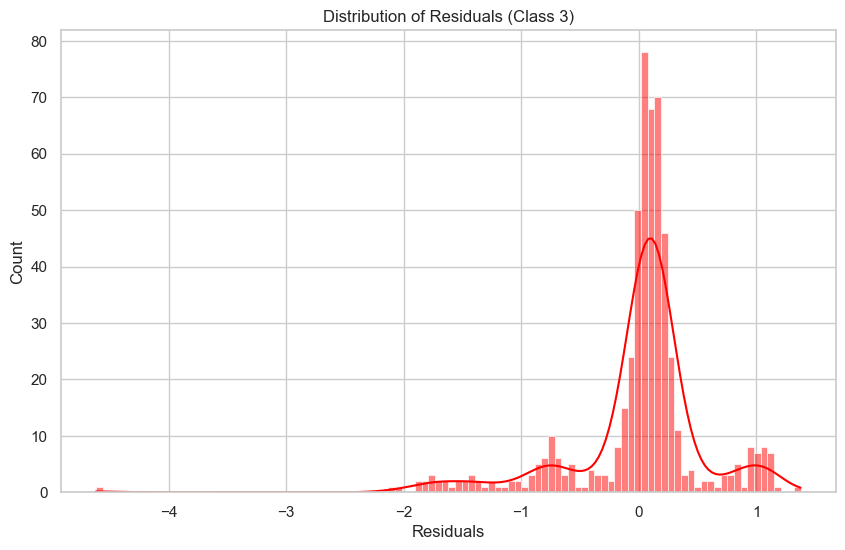

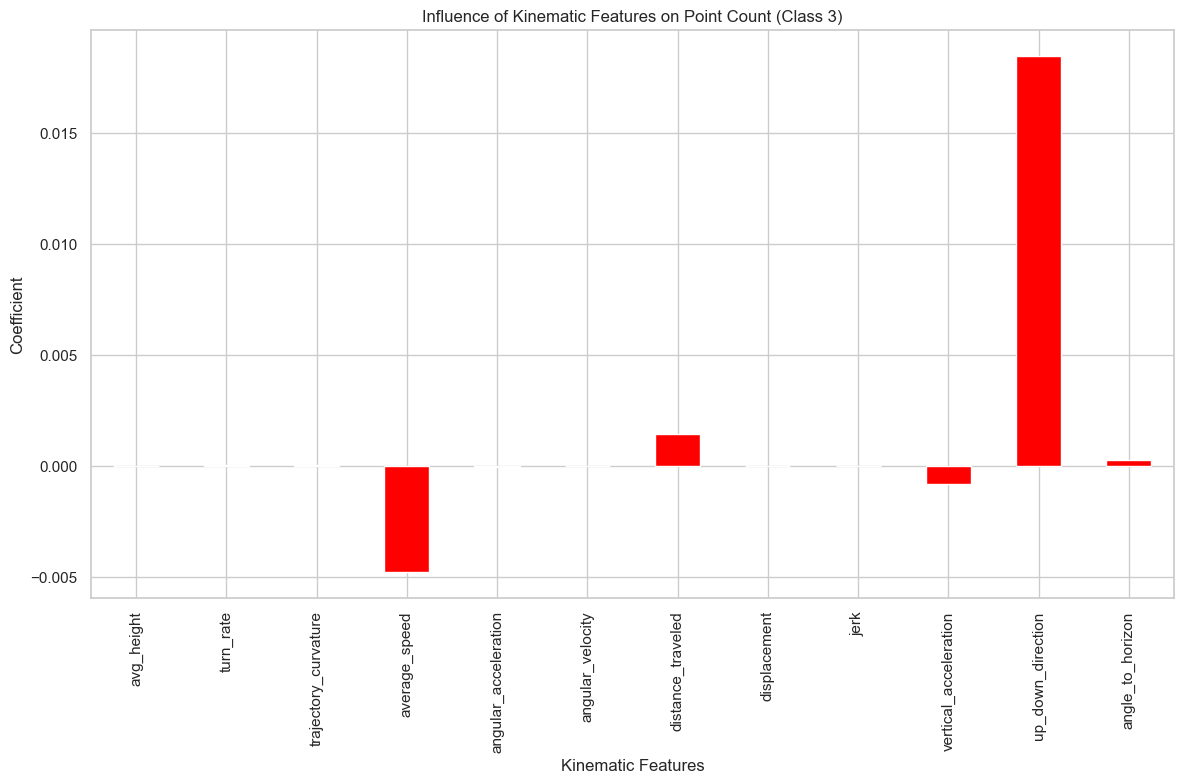

Performing Poisson Regression for Class 4
                 Generalized Linear Model Regression Results                  
Dep. Variable:            point_count   No. Observations:                  185
Model:                            GLM   Df Residuals:                      172
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -444.79
Date:                Thu, 22 Aug 2024   Deviance:                       110.57
Time:                        22:16:47   Pearson chi2:                     108.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

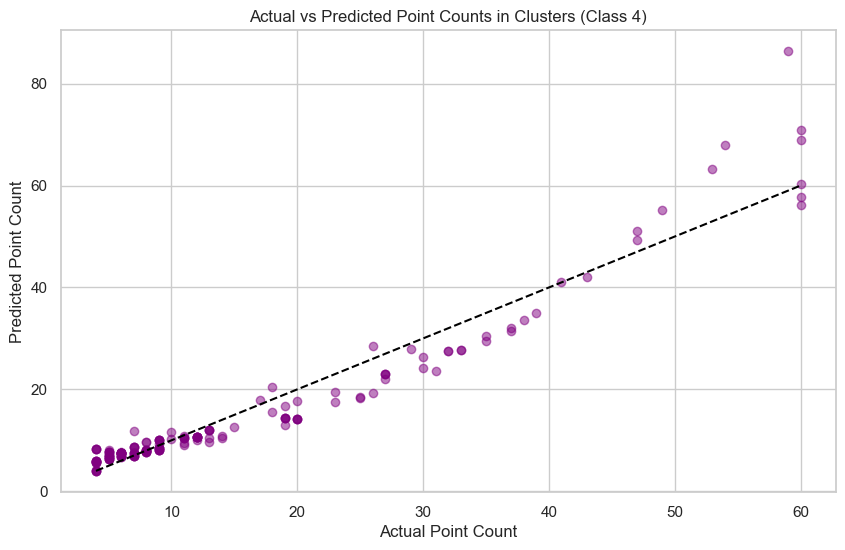

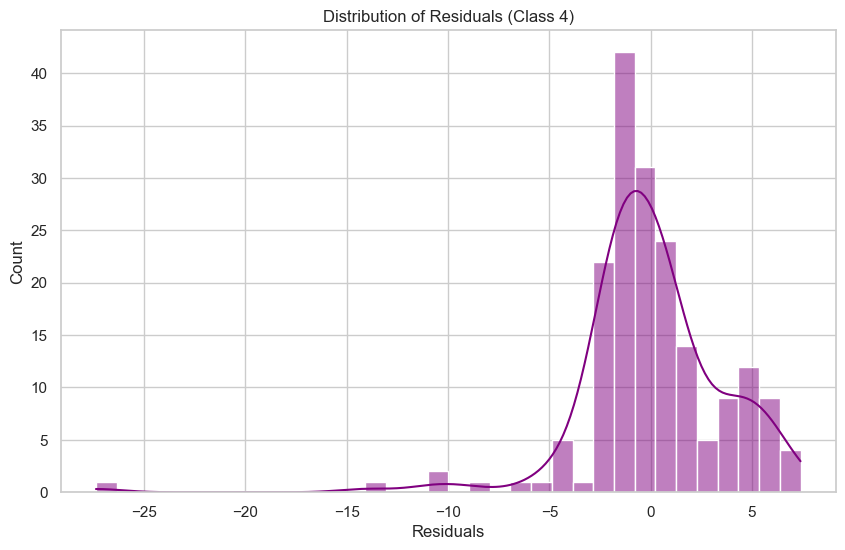

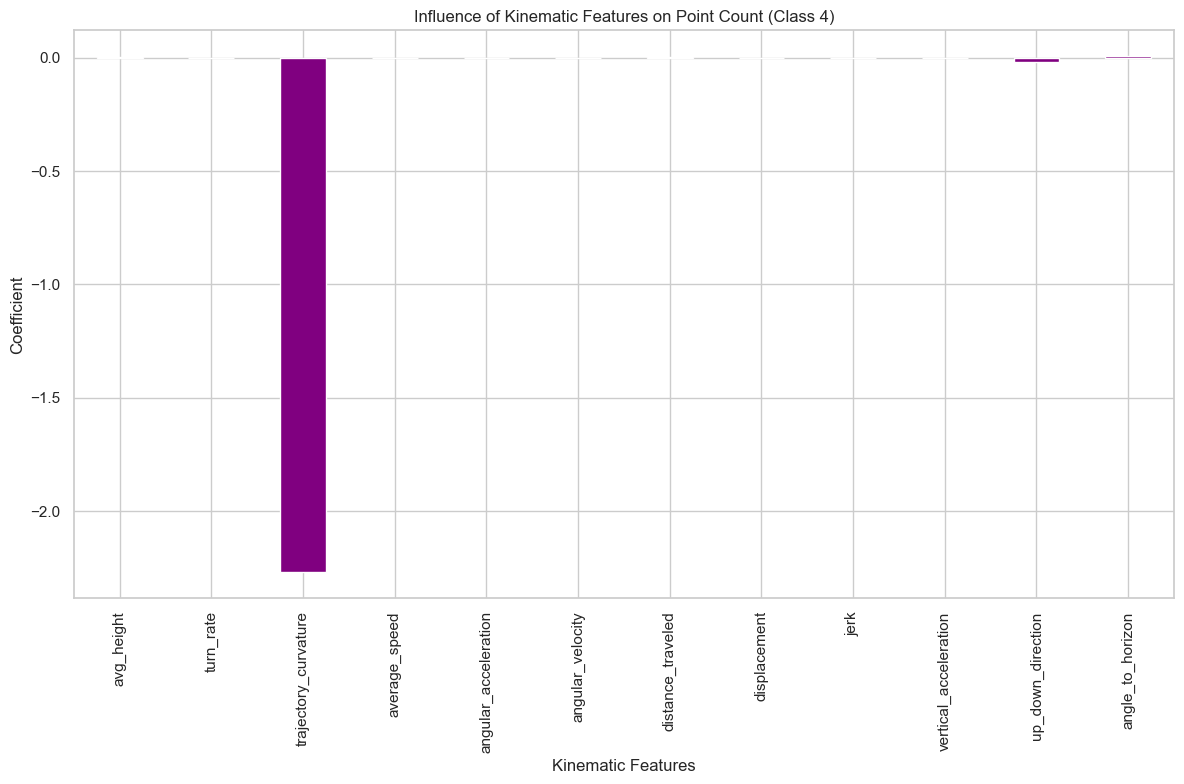

In [419]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'combined_clusters_with_kinematic_features.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Define the explanatory variables (kinematic features)
kinematic_features = ['avg_height', 'turn_rate', 'trajectory_curvature', 'average_speed', 
                      'angular_acceleration', 'angular_velocity', 'distance_traveled',
                      'displacement', 'jerk', 'vertical_acceleration', 'up_down_direction', 
                      'angle_to_horizon']

# Color mapping for each class
class_colors = {1: 'blue', 2: 'green', 3: 'red', 4: 'purple'}

# Function to perform Poisson regression for each class
def poisson_regression_by_class(df, class_label):
    print(f"Performing Poisson Regression for Class {class_label}")
    
    # Filter the data for the specific class
    class_df = df[df['class'] == class_label]
    
    # Remove rows with inf or NaN values
    class_df = class_df.replace([np.inf, -np.inf], np.nan).dropna(subset=kinematic_features)
    
    # Define the response variable (count of points in each cluster)
    class_df['point_count'] = class_df['cluster_size']
    
    # Define the explanatory variables and add a constant to the model (intercept)
    X = sm.add_constant(class_df[kinematic_features])
    
    # Define the response variable
    y = class_df['point_count']
    
    # Fit the Poisson regression model
    poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
    
    # Display the model summary
    print(poisson_model.summary())
    
    # Predict the number of points in each cluster using the Poisson model
    class_df['predicted_point_count'] = poisson_model.predict(X)
    
    # Plot the actual vs predicted point counts
    plt.figure(figsize=(10, 6))
    plt.scatter(class_df['point_count'], class_df['predicted_point_count'], alpha=0.5, color=class_colors[class_label])
    plt.plot([class_df['point_count'].min(), class_df['point_count'].max()], 
             [class_df['point_count'].min(), class_df['point_count'].max()], color='black', linestyle='--')
    plt.xlabel('Actual Point Count')
    plt.ylabel('Predicted Point Count')
    plt.title(f'Actual vs Predicted Point Counts in Clusters (Class {class_label})')
    plt.grid(True)
    plt.show()
    
    # Plot the residuals (difference between actual and predicted point counts)
    class_df['residuals'] = class_df['point_count'] - class_df['predicted_point_count']
    plt.figure(figsize=(10, 6))
    sns.histplot(class_df['residuals'], kde=True, color=class_colors[class_label])
    plt.xlabel('Residuals')
    plt.title(f'Distribution of Residuals (Class {class_label})')
    plt.grid(True)
    plt.show()
    
    # Plot the influence of each kinematic feature on the point count
    plt.figure(figsize=(12, 8))
    poisson_model.params[1:].plot(kind='bar', color=class_colors[class_label])
    plt.title(f'Influence of Kinematic Features on Point Count (Class {class_label})')
    plt.xlabel('Kinematic Features')
    plt.ylabel('Coefficient')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Perform the analysis for each class
for class_label in df['class'].unique():
    poisson_regression_by_class(df, class_label)
